# Analisis Explotarorio de datos (EDA)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

### Datos Wind Speed

In [2]:
load_path = r"C:\Users\danie\OneDrive\Documentos\data_treino_dv_df_2000_2010.csv"
df = pd.read_csv(load_path)

#### Descripcion del tipo de variables


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

El dataframe contiene en total 13 variables, de las cuales 12 son tipo flotante y una es objeto (hora).

#### Reducción de nombres extensos en columnas

In [4]:
df.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

In [5]:
list_rename = {'HORA (UTC)': "hora", 
        'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': "direccion horaria viento",
        'VENTO, VELOCIDADE HORARIA (m/s)' : "velocidad horaria viento",
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)' : "humedad rel. max hora anterior",
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)' :"humedad rel. min hora anterior",
        'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)' : "temperatura max hora anterior",
        'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)' : "temperatura min hora anterior",
        'UMIDADE RELATIVA DO AR, HORARIA (%)' : "humedad relativa horaria", 
        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)' :"presion atmosférica a nivel de estacion",
        'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)' : "precipitacion total por hora ", 
        'VENTO, RAJADA MAXIMA (m/s)' : "maxima rafaga de viento ",
        'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)' : "presion atmosferica max",
        'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)' : "presion atmosferica min"}

In [6]:
df.rename(columns=list_rename, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   hora                                     87693 non-null  object 
 1   direccion horaria viento                 87693 non-null  float64
 2   velocidad horaria viento                 87693 non-null  float64
 3   humedad rel. max hora anterior           87693 non-null  float64
 4   humedad rel. min hora anterior           87693 non-null  float64
 5   temperatura max hora anterior            87693 non-null  float64
 6   temperatura min hora anterior            87693 non-null  float64
 7   humedad relativa horaria                 87693 non-null  float64
 8   presion atmosférica a nivel de estacion  87693 non-null  float64
 9   precipitacion total por hora             87693 non-null  float64
 10  maxima rafaga de viento                  87693

In [8]:
#Pasar horas de objeto a int
df["hora"] = df["hora"].apply(lambda x: pd.to_datetime(x).time().hour)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   hora                                     87693 non-null  int64  
 1   direccion horaria viento                 87693 non-null  float64
 2   velocidad horaria viento                 87693 non-null  float64
 3   humedad rel. max hora anterior           87693 non-null  float64
 4   humedad rel. min hora anterior           87693 non-null  float64
 5   temperatura max hora anterior            87693 non-null  float64
 6   temperatura min hora anterior            87693 non-null  float64
 7   humedad relativa horaria                 87693 non-null  float64
 8   presion atmosférica a nivel de estacion  87693 non-null  float64
 9   precipitacion total por hora             87693 non-null  float64
 10  maxima rafaga de viento                  87693

#### Número de observaciones, media, desviación estándar, mínimo, máximo, cuartiles

In [10]:
(df.describe().T.round(1))

,count,mean,std,min,25%,50%,75%,max
hora,87693.0,11.5,6.9,0.0,5.0,12.0,18.0,23.0
direccion horaria viento,87693.0,0.4,0.7,-1.0,-0.2,0.8,1.0,1.0
velocidad horaria viento,87693.0,2.5,1.3,0.0,1.5,2.4,3.4,10.0
humedad rel. max hora anterior,87693.0,69.1,19.6,12.0,54.0,72.0,87.0,100.0
humedad rel. min hora anterior,87693.0,63.2,20.2,10.0,48.0,64.0,80.0,98.0
temperatura max hora anterior,87693.0,21.9,3.7,9.2,19.2,21.4,24.7,35.3
temperatura min hora anterior,87693.0,20.7,3.5,8.4,18.4,20.2,23.1,34.4
humedad relativa horaria,87693.0,66.1,20.0,10.0,51.0,68.0,84.0,99.0
presion atmosférica a nivel de estacion,87693.0,887.3,4.0,863.4,885.3,887.2,889.1,1023.5
precipitacion total por hora,87693.0,0.2,1.3,0.0,0.0,0.0,0.0,70.8


- Dirección Horaria Viento: Los valores varían entre -1 y 1..
- Velocidad Horaria Viento: La velocidad del viento varía entre 0 y 10 m/s, con una media de 2.5 m/s.
- Humedad Relativa: La humedad relativa varía ampliamente, con medias de 69.1% y 63.2% para el máximo y mínimo respectivamente.
- Temperatura: Las temperaturas máxima y mínima tienen medias de 21.9°C y 20.7°C respectivamente, mostrando una variabilidad moderada en el clima del lugar de estudio.
- Humedad Relativa Horaria: La media es del 66.1%, lo que indica un ambiente generalmente húmedo.
- Presión Atmosférica a Nivel de Estación: La presión promedio es de 887.3 mB, con valores que varían desde 863.4 mB hasta 1023.5 mB. 
- Precipitación Total por Hora: Aunque la media de precipitación es solo de 0.2 mm, el máximo es de 70.8 mm, esto puede indicar que ocasionalmente ocurran lluvias intensas.
- Máxima Ráfaga de Viento: El viento puede alcanzar rafagas de hasta 24.3 m/s, sin embargo en promedio son de 5.2 m/s.

#### Conteo de datos faltantes y su porcentaje

In [11]:
df.isnull().sum()

hora                                       0
direccion horaria viento                   0
velocidad horaria viento                   0
humedad rel. max hora anterior             0
humedad rel. min hora anterior             0
temperatura max hora anterior              0
temperatura min hora anterior              0
humedad relativa horaria                   0
presion atmosférica a nivel de estacion    0
precipitacion total por hora               0
maxima rafaga de viento                    0
presion atmosferica max                    0
presion atmosferica min                    0
dtype: int64

In [12]:
(df.isnull().sum()/(len(df)))*100

hora                                       0.0
direccion horaria viento                   0.0
velocidad horaria viento                   0.0
humedad rel. max hora anterior             0.0
humedad rel. min hora anterior             0.0
temperatura max hora anterior              0.0
temperatura min hora anterior              0.0
humedad relativa horaria                   0.0
presion atmosférica a nivel de estacion    0.0
precipitacion total por hora               0.0
maxima rafaga de viento                    0.0
presion atmosferica max                    0.0
presion atmosferica min                    0.0
dtype: float64

No hay valores faltantes en el dataset por lo que no es necesario realizar imputación.

#### Histograma o diagrama de barras para la variables

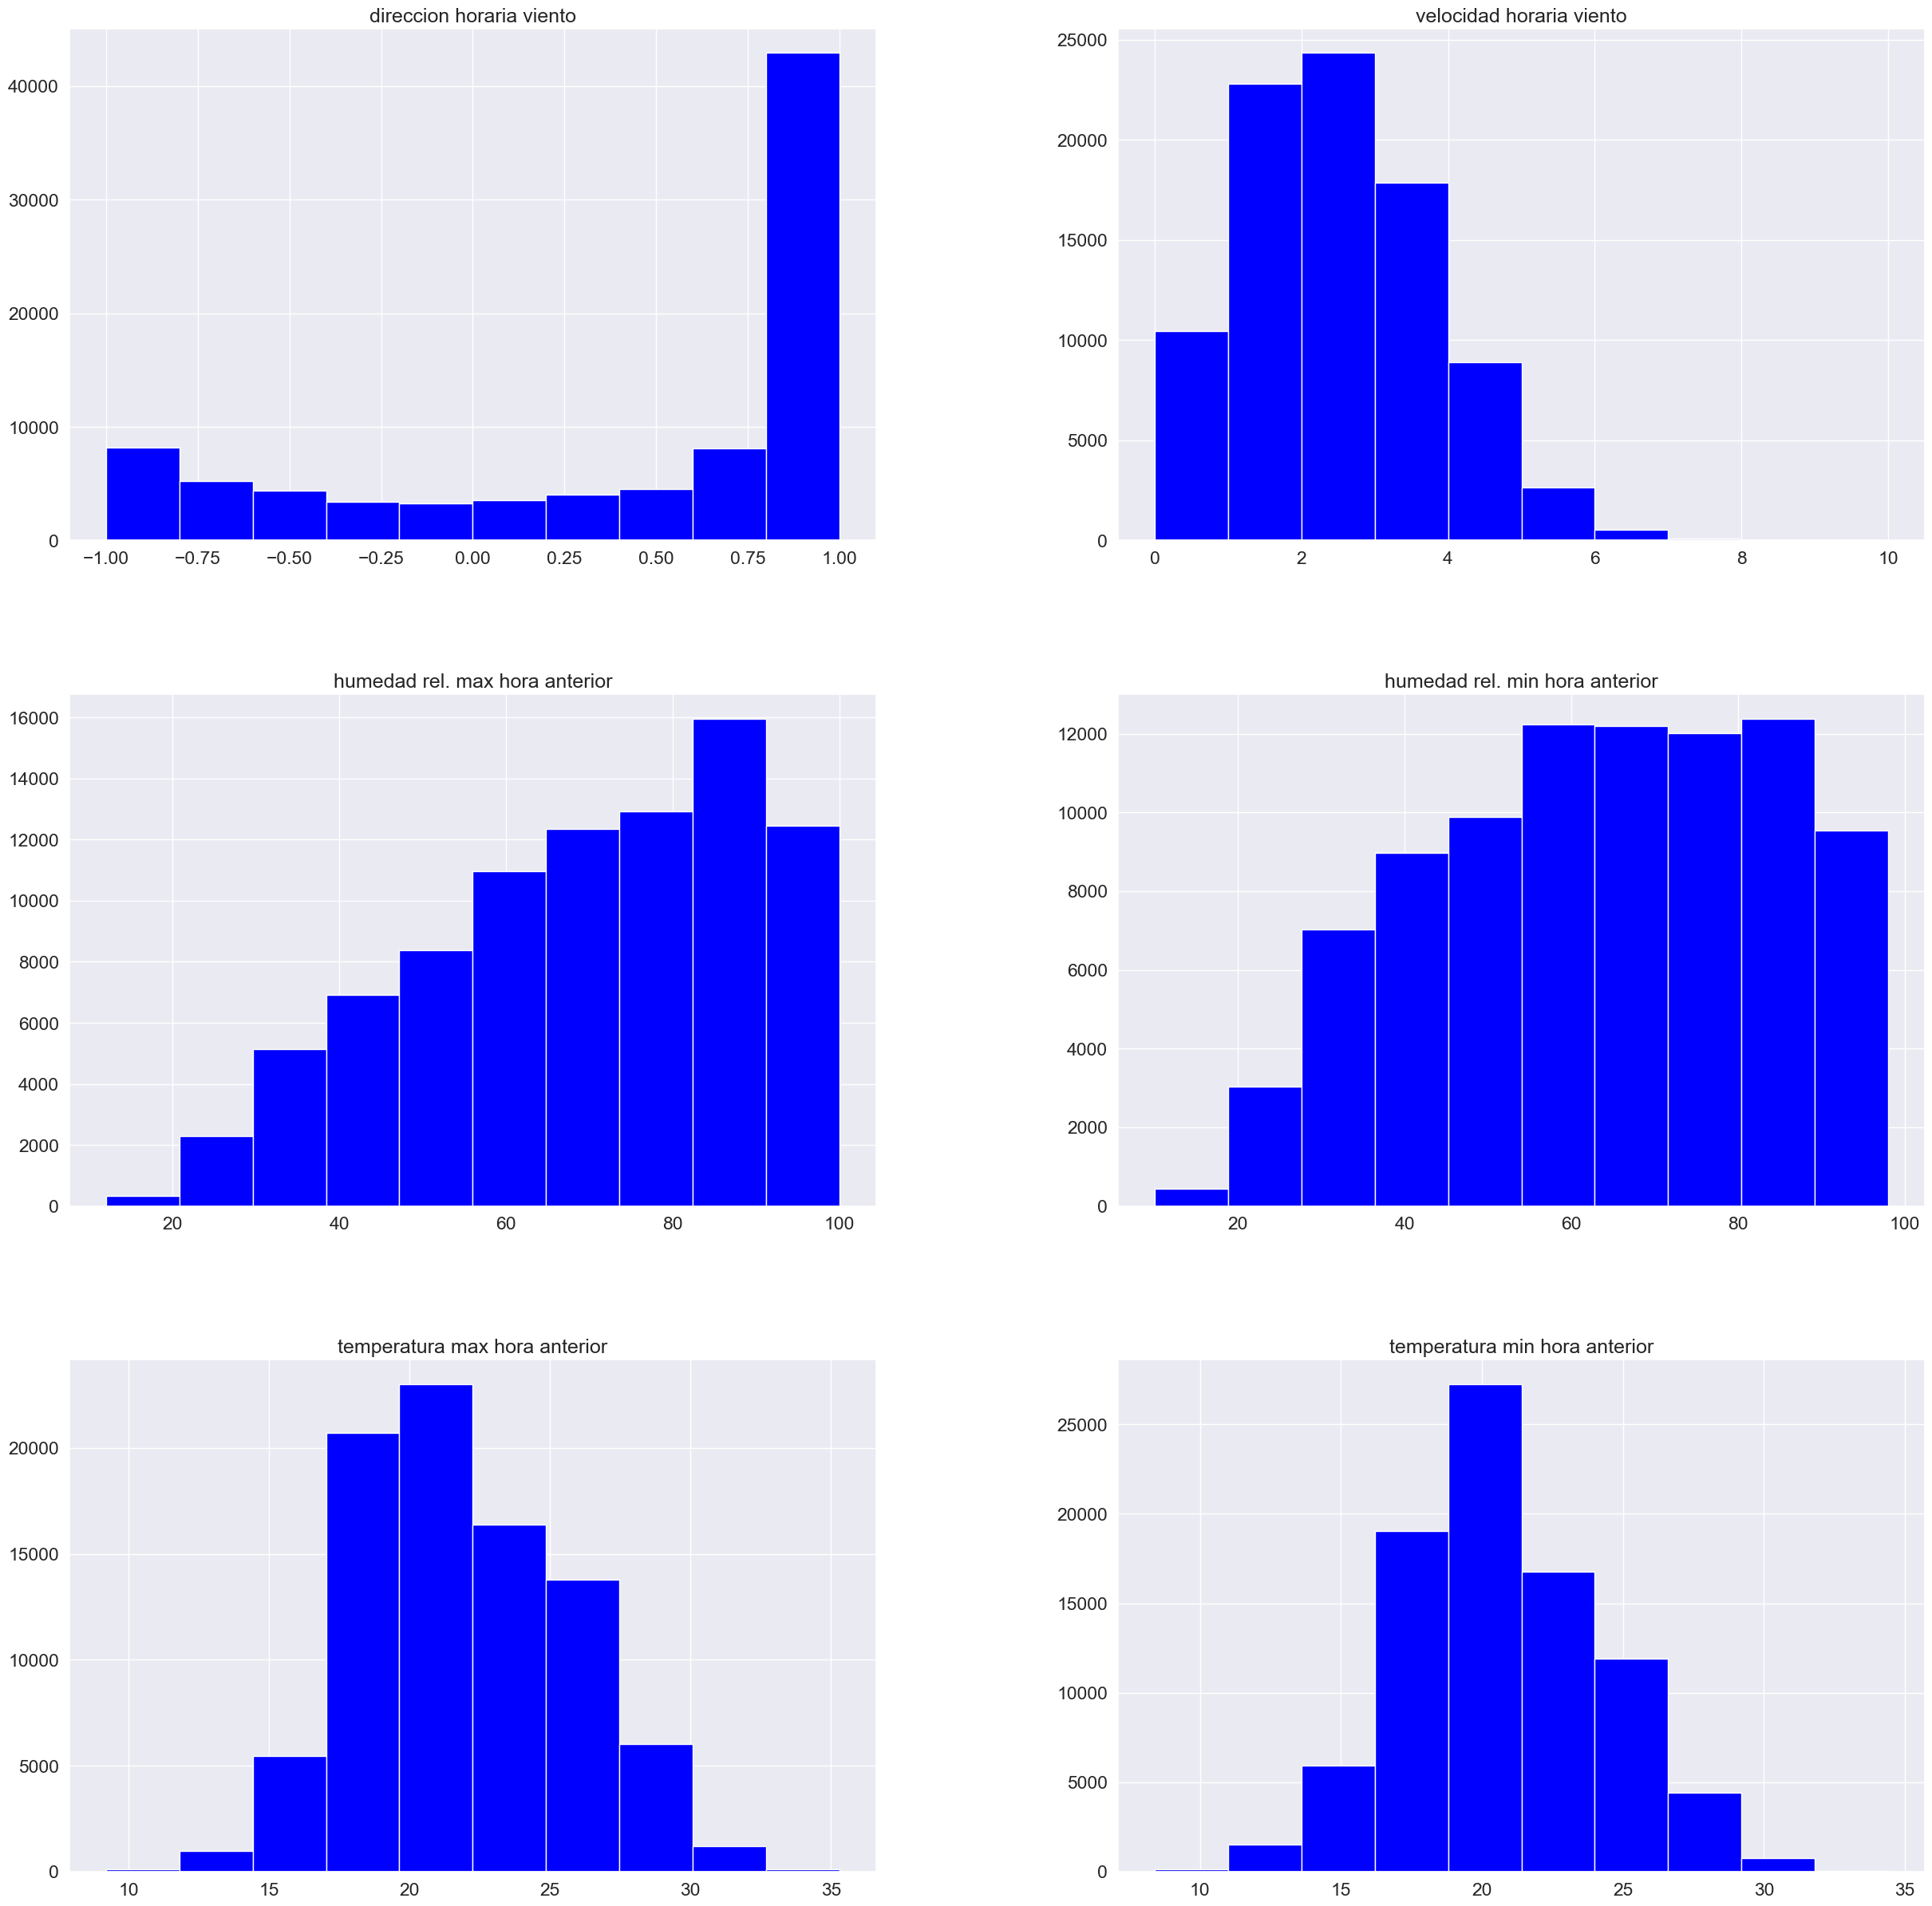

In [13]:
sns.set(font_scale=1.5)
df.iloc[: , 1:-6].hist(figsize = (30,30), color = 'blue');

- Velocidad Horaria Viento: esta sezgada a la derecha, se observa adicionalmente que la mayoria de observaciones se encuentran en velocidad más bajas.
- Dirección Horaria Viento: muestra un sesgo hacia la izquierda. Esto sugiere que, aunque hay una dirección predominante del viento que es más frecuente (representada por el pico en el extremo derecho), también hay ocasiones en las que el viento proviene de direcciones opuestas o contrarias.
- Las humedades real max y min se encuentran sezgadas hacia la izquierda.
- La temperatura max y min es simetrica puesto que contiene la mayor cantidad de datos en el centro del grafico, esto traduce a que en general la temperatura oscila en 20 grados centigrados.

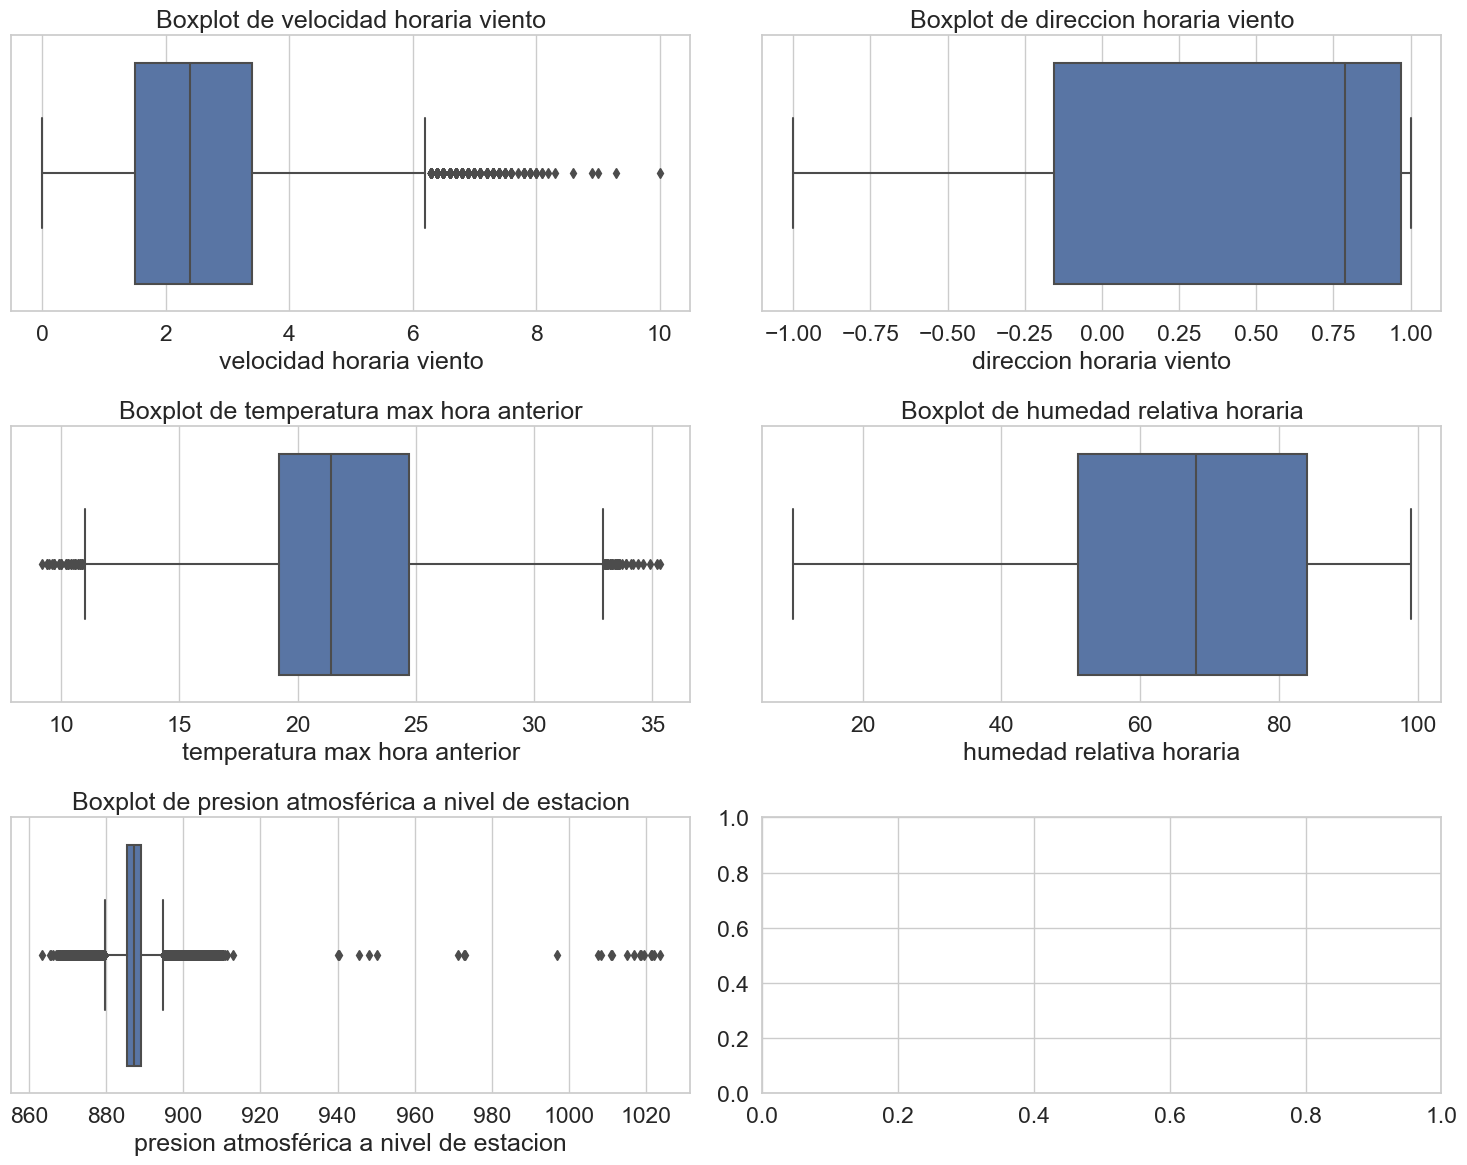

In [14]:
sns.set_style("whitegrid")

variables = ['velocidad horaria viento', 'direccion horaria viento', 
             'temperatura max hora anterior', 'humedad relativa horaria', 
             'presion atmosférica a nivel de estacion']

n_cols = 2
n_rows = int(len(variables) / n_cols) + (len(variables) % n_cols)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))

for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=df[var], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot de {var}')

plt.tight_layout() 
plt.show()


- La velocidad horaria es en promedio 3, presenta datos atipicos.
- La temperatura en pomedio esta en 23 grados y presenta valores atipicos para cada bigote.
- La presion atmosferica no presenta mucha variabilidad.
- La humeda relativa esta sesgazada a la derecha.

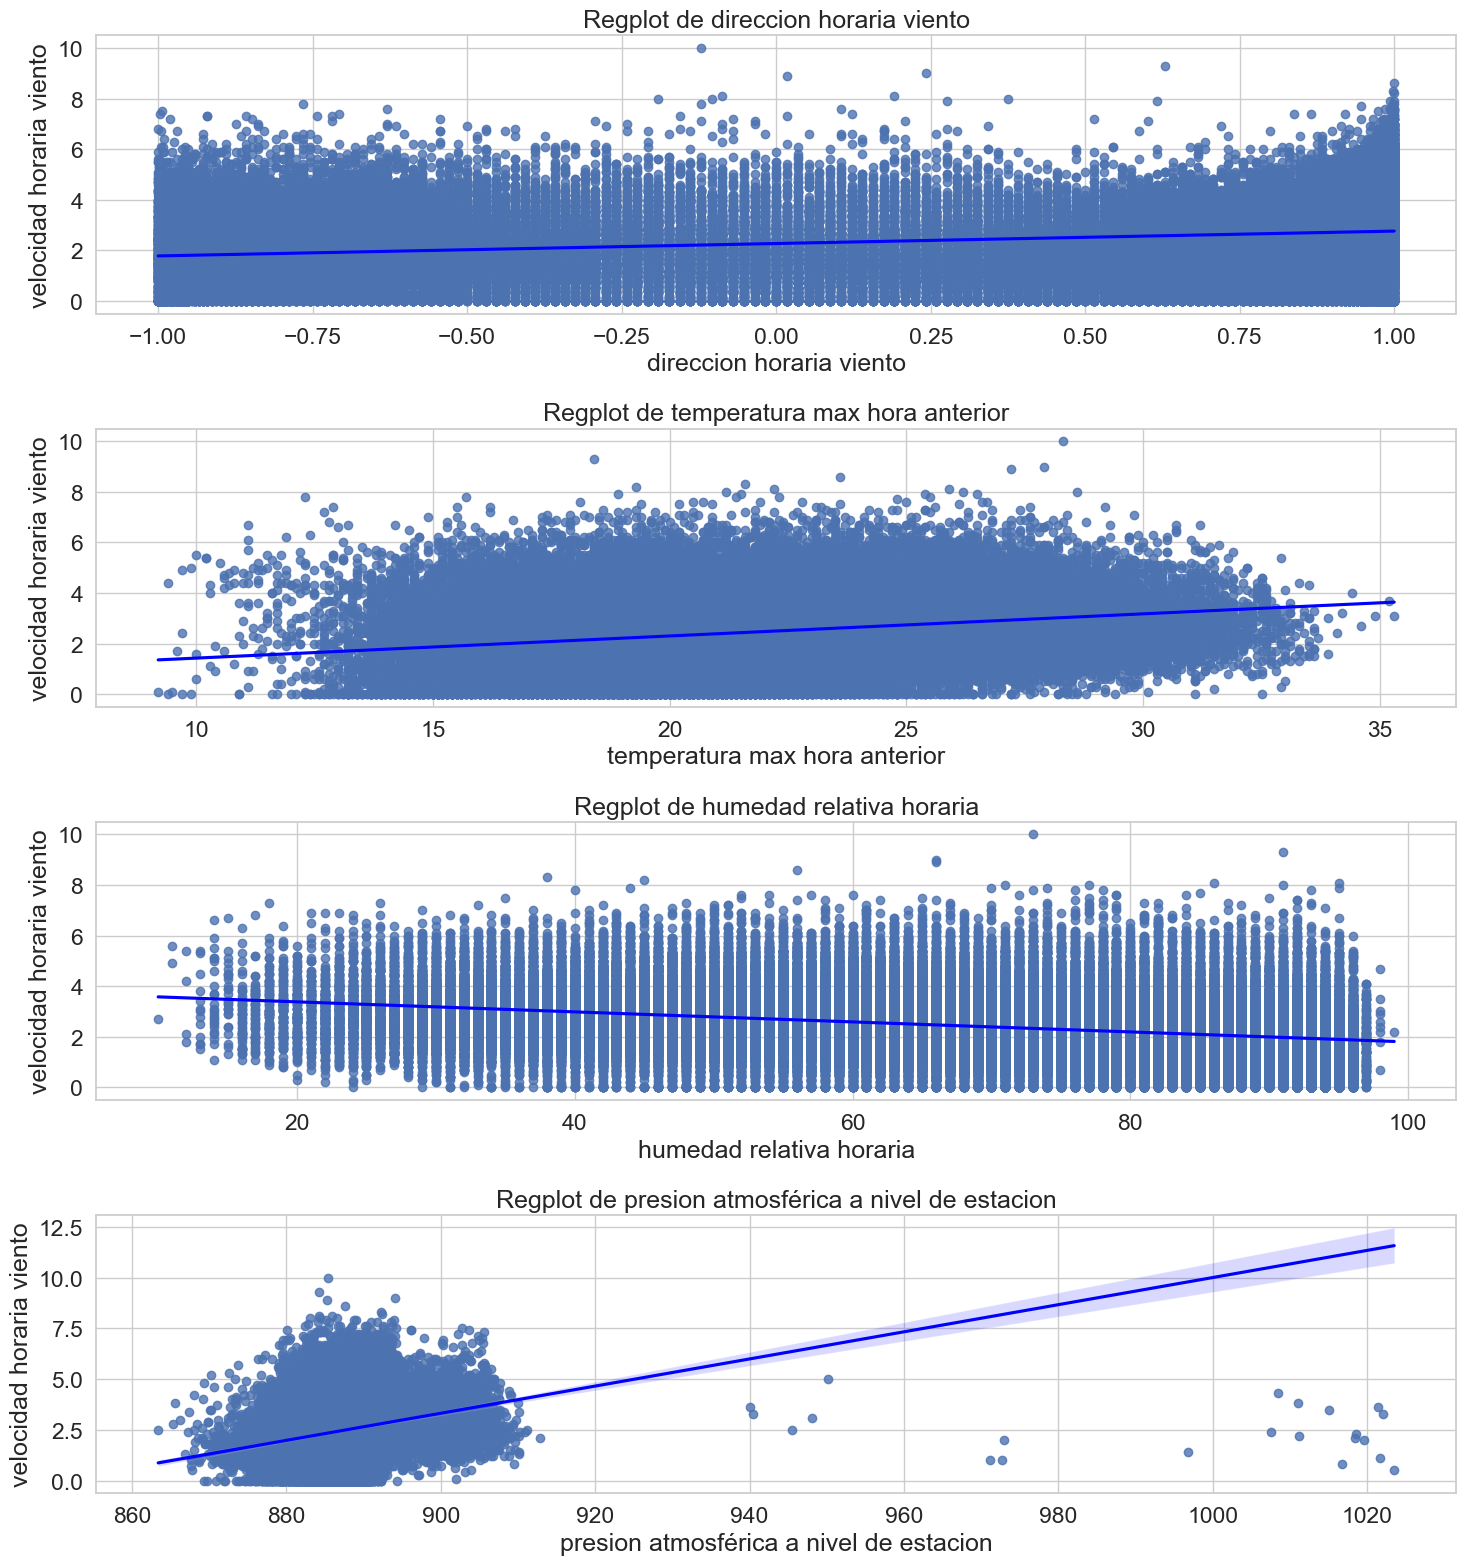

In [15]:
variables = ['direccion horaria viento', 
             'temperatura max hora anterior', 'humedad relativa horaria', 
             'presion atmosférica a nivel de estacion']

fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(15, 4 * len(variables)))

for id, var in enumerate(variables):
    
    sns.regplot(data=df, x=var, y='velocidad horaria viento', scatter=True, line_kws={"color": "blue"}, ax=axs[id])
    axs[id].set_title(f'Regplot de {var}')
plt.tight_layout()   

Se identifica lo siguiente:

- Una mayor temperatura no afecta sustancialmente la velocidad del viento.
- Al incrementar la humedad relativa tambien aumenta la velocidad del viento.
- A mayor humedad relativa menor sera la velocidad del viento.
- La presion atmosferica a nivel de estacion aumenta directamente la velocidad horaria del viento.

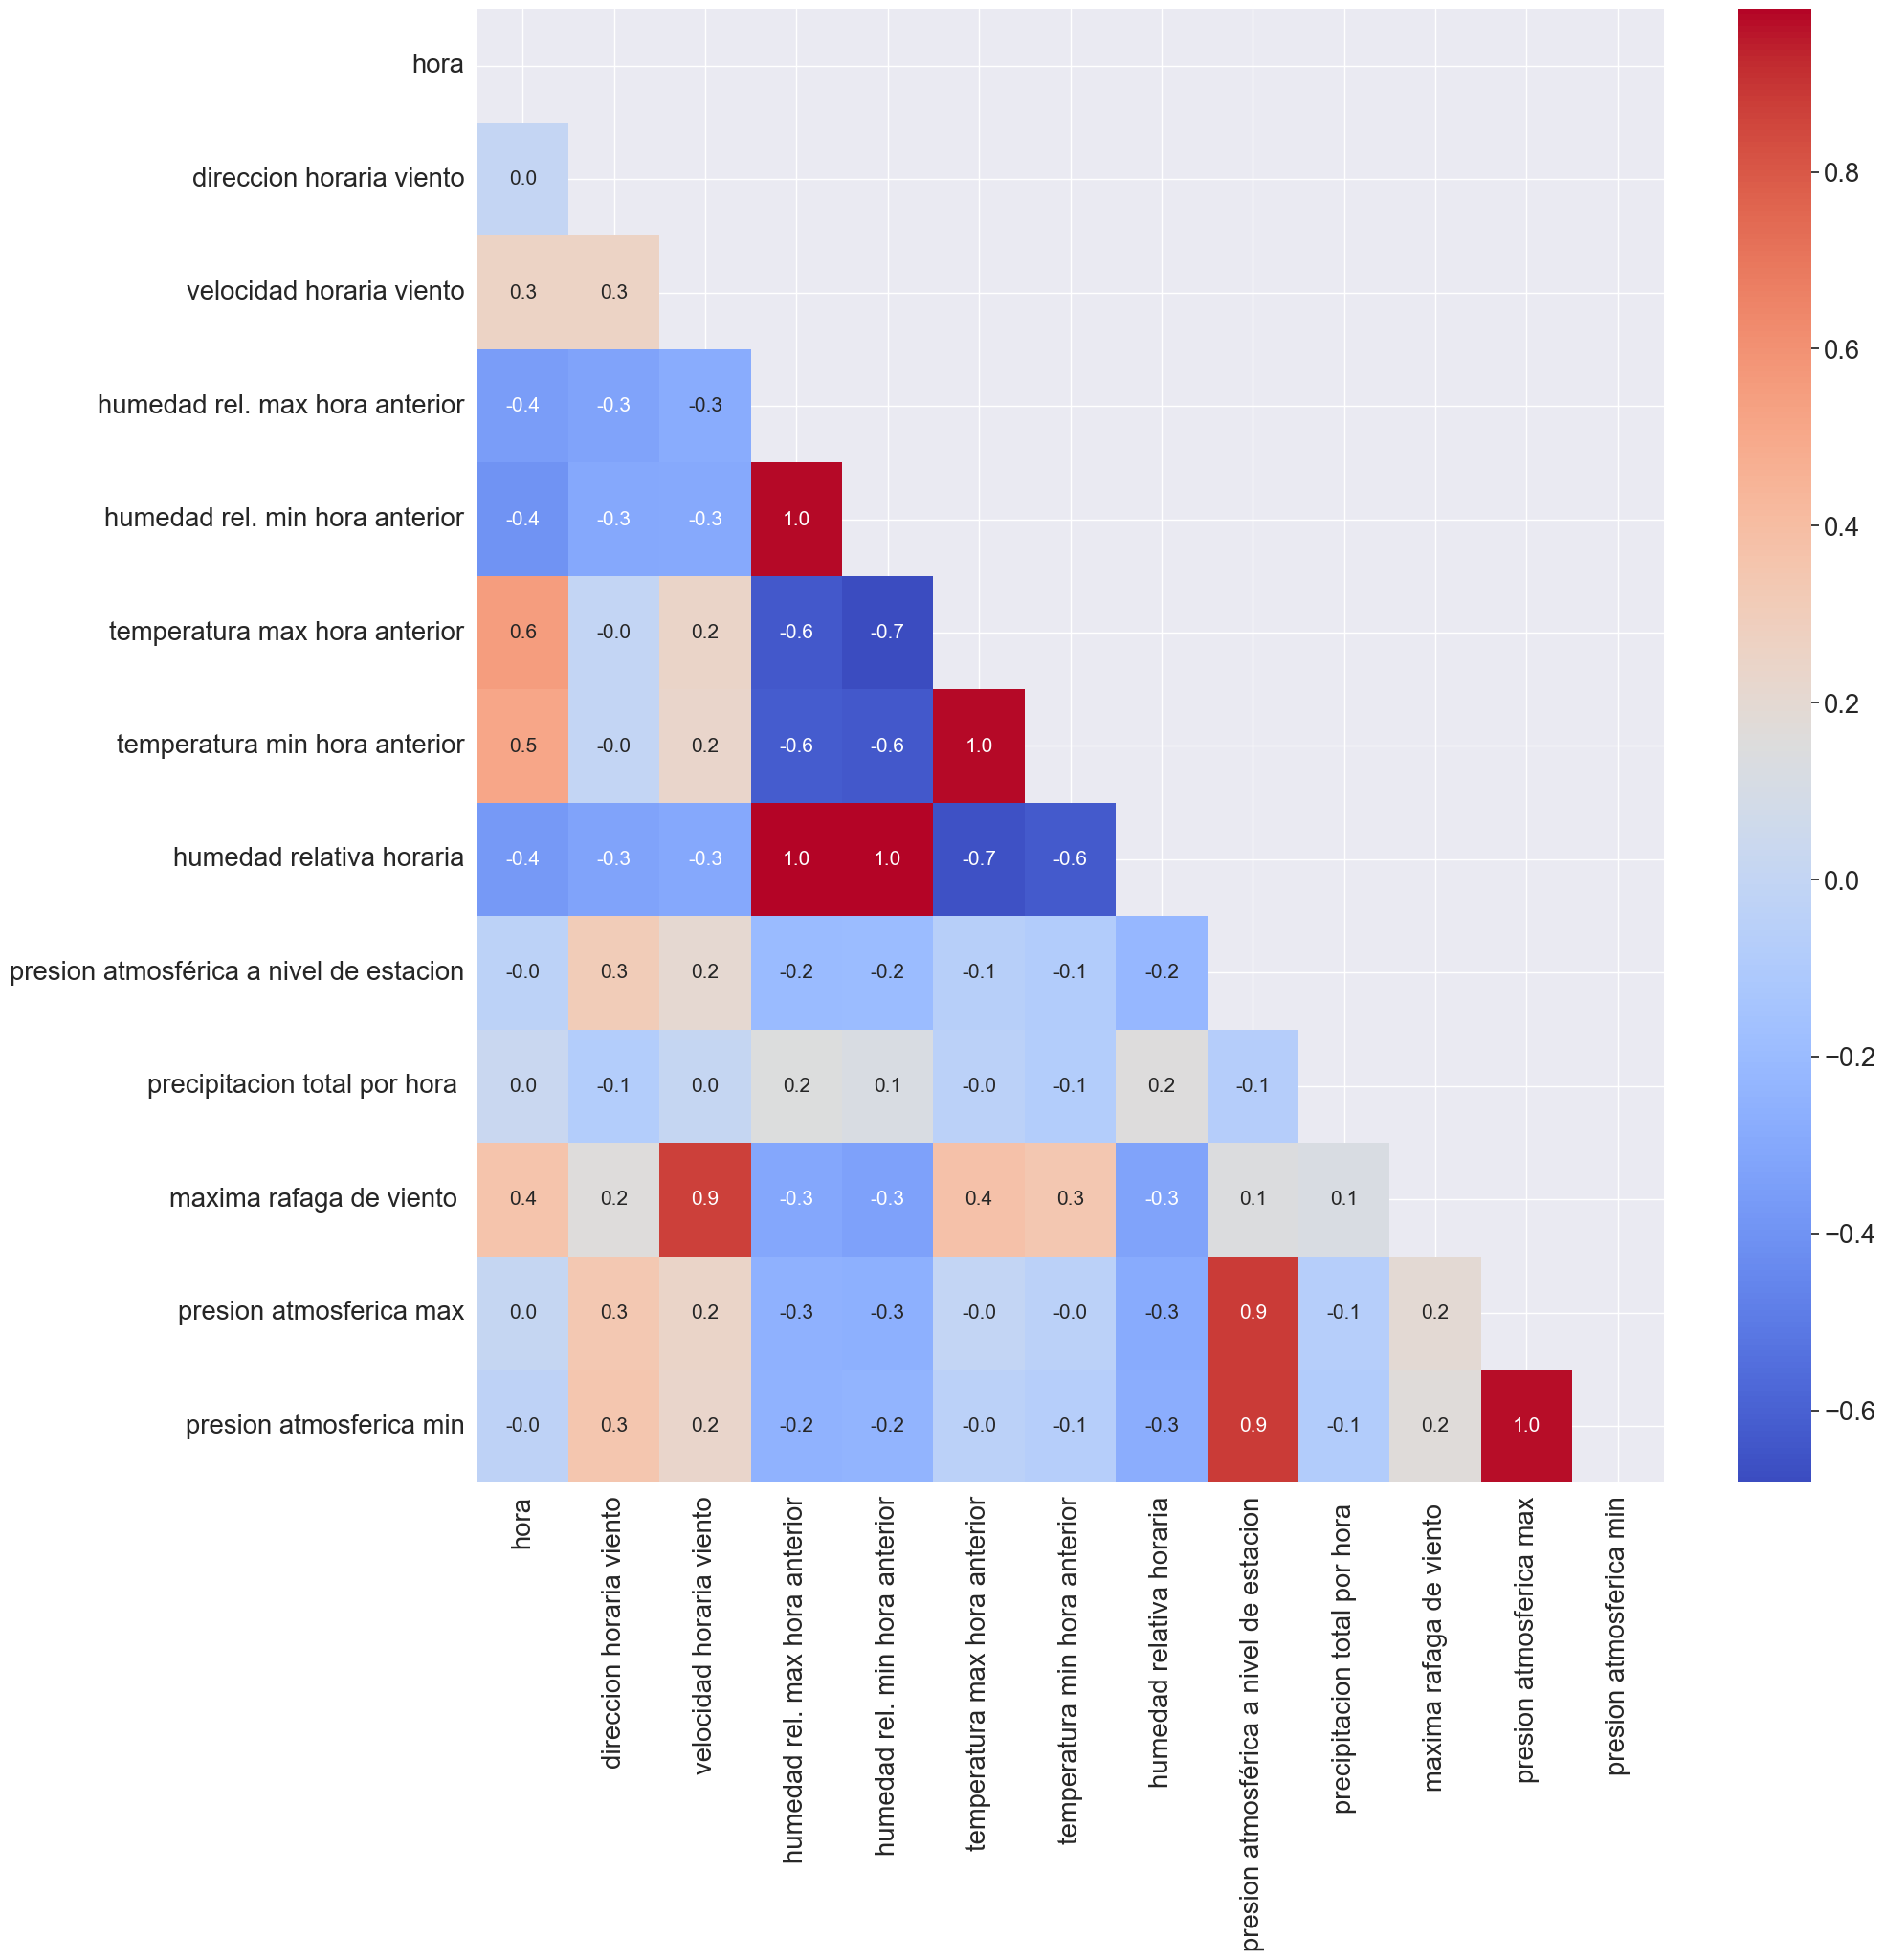

In [16]:
corr_matrix = df.corr()
import numpy as np
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))   
sns.heatmap(corr_matrix, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='coolwarm');

Se observa que hay variables con correlaciones de 1, esto es, estan altamente relacionadas y por lo tanto son redundantes para el modelo. Se decide entonces utilizar el método VIF (Variance Inflation Factor) para identificar la multicolinealidad en un conjunto de datos y reducirla. Valores de VIF por encima de 5-10 sugiere que hay multicolinealidad alta entre la variable y al menos una otra variable y por lo tanto debe de ser removida del modelo.

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
df_vif = df
df_vif= df_vif.drop(['velocidad horaria viento'],axis=1)

df_vif = df_vif.replace([np.inf, -np.inf], np.nan).dropna()

X = df_vif.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

                                    feature        VIF
0                                      hora   1.535066
1                  direccion horaria viento   1.312001
2            humedad rel. max hora anterior  77.951749
3            humedad rel. min hora anterior  80.849151
4             temperatura max hora anterior  68.492554
5             temperatura min hora anterior  57.283224
6                  humedad relativa horaria  51.851514
7   presion atmosférica a nivel de estacion   4.900754
8             precipitacion total por hora    1.122183
9                  maxima rafaga de viento    1.325654
10                  presion atmosferica max  16.065974
11                  presion atmosferica min  16.499324


Se removera la columna humedad rel. min hora anterior pues esta presenta el VIF más grande.

In [19]:
df_vif= df_vif.drop(["humedad rel. min hora anterior"],axis=1)

X = df_vif.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

                                    feature        VIF
0                                      hora   1.529583
1                  direccion horaria viento   1.311674
2            humedad rel. max hora anterior  41.754347
3             temperatura max hora anterior  30.834055
4             temperatura min hora anterior  26.788844
5                  humedad relativa horaria  46.388935
6   presion atmosférica a nivel de estacion   4.900632
7             precipitacion total por hora    1.122181
8                  maxima rafaga de viento    1.325499
9                   presion atmosferica max  16.044685
10                  presion atmosferica min  16.492733


La variable humedad rel. max hora anterior se remueve del dataframe puesto que es la que mayor VIF presenta (41.75)

In [20]:
df_vif= df_vif.drop(["humedad rel. max hora anterior"],axis=1)

X = df_vif.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

                                   feature        VIF
0                                     hora   1.529426
1                 direccion horaria viento   1.311637
2            temperatura max hora anterior  24.599178
3            temperatura min hora anterior  21.533187
4                 humedad relativa horaria   2.446961
5  presion atmosférica a nivel de estacion   4.900491
6            precipitacion total por hora    1.105983
7                 maxima rafaga de viento    1.325406
8                  presion atmosferica max  16.030280
9                  presion atmosferica min  16.490573


La columna temperatura max hora anterior se elimina del modelo por tener el VIF mayor.

In [21]:
df_vif= df_vif.drop(["temperatura max hora anterior"],axis=1)

X = df_vif.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

                                   feature        VIF
0                                     hora   1.464874
1                 direccion horaria viento   1.286975
2            temperatura min hora anterior   2.240830
3                 humedad relativa horaria   2.252262
4  presion atmosférica a nivel de estacion   4.900068
5            precipitacion total por hora    1.074089
6                 maxima rafaga de viento    1.315053
7                  presion atmosferica max  15.726554
8                  presion atmosferica min  16.212432


Se elimina la columna presion atmosferica min debido a que tiene el VIF mas grande entre las variables presentes.

In [22]:
df_vif= df_vif.drop(["presion atmosferica min"],axis=1)

X = df_vif.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_vif.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

                                   feature       VIF
0                                     hora  1.449601
1                 direccion horaria viento  1.282038
2            temperatura min hora anterior  2.235192
3                 humedad relativa horaria  2.246231
4  presion atmosférica a nivel de estacion  4.552538
5            precipitacion total por hora   1.069973
6                 maxima rafaga de viento   1.315007
7                  presion atmosferica max  4.757647


No hay variable con VIF >5 por lo que se concluye que no hay variables que esten altamentes correlacionadas.

In [23]:
df.drop(["humedad rel. min hora anterior","humedad rel. max hora anterior",
         "temperatura max hora anterior","presion atmosferica min","presion atmosferica min"],
        inplace=True,axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   hora                                     87693 non-null  int64  
 1   direccion horaria viento                 87693 non-null  float64
 2   velocidad horaria viento                 87693 non-null  float64
 3   temperatura min hora anterior            87693 non-null  float64
 4   humedad relativa horaria                 87693 non-null  float64
 5   presion atmosférica a nivel de estacion  87693 non-null  float64
 6   precipitacion total por hora             87693 non-null  float64
 7   maxima rafaga de viento                  87693 non-null  float64
 8   presion atmosferica max                  87693 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.0 MB


### Datos Fraud Detection

In [25]:
import klib
load_path1= r"C:\Users\danie\OneDrive\Documentos\train_transaction.csv"
load_path2=r"C:\Users\danie\OneDrive\Documentos\train_identity.csv"
df1= pd.read_csv(load_path1)
df2= pd.read_csv(load_path2)

In [26]:
df_f = pd.merge(df1,df2,on="TransactionID",how="left")

In [27]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [28]:
df_f.drop(["TransactionID"],axis=1,inplace=True)

El DataFrame tiene 590,540 filas, contiene 434 columnas, es decir, 434 características o variables diferentes para cada observación.

Tipos de datos:
- Float64: 399 de las columnas contienen datos de tipo decimal.
- Int64: 4 de las columnas contienen datos enteros.
- Object: 31 columnas contienen datos de tipo objeto.

In [29]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df

In [30]:
df_f = reduce_mem_usage(df_f)

Initial memory usage of dataframe is 2567.09 MB/2.51 GB
Memory usage after optimization is: 527.95 MB/0.52 GB
Decreased by 79.4%


In [31]:
(df_f.isnull().sum()/(len(df_f)))*100

isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
                    ...    
id_36             76.126088
id_37             76.126088
id_38             76.126088
DeviceType        76.155722
DeviceInfo        79.905510
Length: 433, dtype: float64

Se observa que hay variables con hasta 80% de valores faltantes, se decide remover del modelo aquellas variables que tengan 40% o mas de valores faltantes.

In [32]:
threshold = len(df_f) * 0.4
df_f = df_f.dropna(axis=1, thresh=threshold)

In [33]:
(df_f.isnull().sum()/(len(df_f)))*100

isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
                    ...   
V317              0.002032
V318              0.002032
V319              0.002032
V320              0.002032
V321              0.002032
Length: 225, dtype: float64

Se redujo el modelo el dataframe de un total de 434 columnas a 226.

Se realizara la imputacion de los valores numericos que tienen faltantes con el imputer.

In [34]:
from sklearn.impute import SimpleImputer

numeric_cols = df_f.select_dtypes(include='number').columns
non_numeric_cols = df_f.select_dtypes(exclude='number').columns
df_copy = df_f.copy()

imputer = SimpleImputer(strategy='median')

df_copy[numeric_cols] = imputer.fit_transform(df_f[numeric_cols])

In [35]:
df_f = df_copy

In [36]:
(df_f[numeric_cols].isnull().sum()/(len(df_f)))*100

isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
card1             0.0
card2             0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 212, dtype: float64

In [37]:
(df_f[non_numeric_cols].isnull().sum()/(len(df_f)))*100

ProductCD         0.000000
card4             0.267044
card6             0.266028
P_emaildomain    15.994852
M1               45.907136
M2               45.907136
M3               45.907136
M4               47.658753
M5               59.349409
M6               28.678836
M7               58.635317
M8               58.633115
M9               58.633115
dtype: float64

Se procede a eliminar las filas que tengan valores faltantes dentro de las variables.

In [38]:
df_f = df_f.dropna(subset=non_numeric_cols)

In [39]:
(df_f[non_numeric_cols].isnull().sum()/(len(df_f)))*100

ProductCD        0.0
card4            0.0
card6            0.0
P_emaildomain    0.0
M1               0.0
M2               0.0
M3               0.0
M4               0.0
M5               0.0
M6               0.0
M7               0.0
M8               0.0
M9               0.0
dtype: float64

In [40]:
from scipy.stats import chi2_contingency

def chi2_test_for_all_pairs(df):
  
    categorical_columns = df.select_dtypes(['object', 'category']).columns
    
    results = []
    
    # Iterar sobre cada par de columnas categóricas
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            col1 = categorical_columns[i]
            col2 = categorical_columns[j]
            
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Realizar la prueba chi2
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            results.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Chi2 Statistic': chi2,
                'p-value': p
            })
    
    return pd.DataFrame(results)

In [41]:
chi2_test_for_all_pairs(df_f)

,Variable 1,Variable 2,Chi2 Statistic,p-value
0,ProductCD,card4,0.000000,1.000000e+00
1,ProductCD,card6,0.000000,1.000000e+00
2,ProductCD,P_emaildomain,0.000000,1.000000e+00
3,ProductCD,M1,0.000000,1.000000e+00
4,ProductCD,M2,0.000000,1.000000e+00
...,...,...,...,...
73,M6,M8,656.785713,7.470747e-145
74,M6,M9,858.962353,8.187359e-189
75,M7,M8,27707.428312,0.000000e+00
76,M7,M9,3393.410273,0.000000e+00


Se observa que la variable M7 esta relacionada con M8 ( valor p=0), y a la vez m7 esta relacionada con M9, al igual que M8 con M9, por lo que se removeran M8 y M9.
M1 esta relacionada con M2-M9 por lo que se remueven el resto de M. 

In [42]:
df_f.drop(["M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"], axis=1, inplace=True)

In [43]:
df_f.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=217)

La variable del modelo "V", dice ofrecer una gran variedad de funciones, como la clasificación, el recuento y otras relaciones entre entidades, sin embargo, ya que no se cuenta con entendimiento mayor de que a que se refiere. Adicionalmente causa que el dataframe sea extenso sin ser necesario (Hay 180 columnas de Vxxx en el dataframe) por lo que sera removido.

In [44]:
columns_to_drop = [col for col in df_f.columns if col.startswith('V')]
num_columns_to_drop = len(columns_to_drop)
print(columns_to_drop)
print(f'Number of columns to drop: {num_columns_to_drop}')

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V2

In [45]:
df_f = df_f.drop(columns=columns_to_drop)

In [46]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104194 entries, 2 to 590536
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   isFraud         104194 non-null  float64 
 1   TransactionDT   104194 non-null  float64 
 2   TransactionAmt  104194 non-null  float64 
 3   ProductCD       104194 non-null  category
 4   card1           104194 non-null  float64 
 5   card2           104194 non-null  float64 
 6   card3           104194 non-null  float64 
 7   card4           104194 non-null  category
 8   card5           104194 non-null  float64 
 9   card6           104194 non-null  category
 10  addr1           104194 non-null  float64 
 11  addr2           104194 non-null  float64 
 12  dist1           104194 non-null  float64 
 13  P_emaildomain   104194 non-null  category
 14  C1              104194 non-null  float64 
 15  C2              104194 non-null  float64 
 16  C3              104194 non-null  float

In [47]:
non_numeric_columns = df_f.select_dtypes(exclude='number')
print(non_numeric_columns)

       ProductCD       card4   card6 P_emaildomain M1
2              W        visa   debit   outlook.com  T
6              W        visa   debit     yahoo.com  T
20             W  mastercard   debit     gmail.com  T
42             W        visa   debit     gmail.com  T
46             W        visa   debit     gmail.com  T
...          ...         ...     ...           ... ..
590517         W        visa  credit   hotmail.com  T
590520         W        visa   debit     yahoo.com  T
590522         W        visa   debit     gmail.com  T
590524         W  mastercard   debit     gmail.com  T
590536         W  mastercard   debit     gmail.com  T

[104194 rows x 5 columns]


In [48]:
unique_values = {}

for column in non_numeric_columns:
    unique_values[column] = df_f[column].unique()

unique_values


{'ProductCD': ['W']
 Categories (5, object): ['C', 'H', 'R', 'S', 'W'],
 'card4': ['visa', 'mastercard', 'discover']
 Categories (4, object): ['american express', 'discover', 'mastercard', 'visa'],
 'card6': ['debit', 'credit', 'debit or credit']
 Categories (4, object): ['charge card', 'credit', 'debit', 'debit or credit'],
 'P_emaildomain': ['outlook.com', 'yahoo.com', 'gmail.com', 'hotmail.com', 'ymail.com', ..., 'yahoo.es', 'yahoo.com.mx', 'hotmail.es', 'yahoo.de', 'hotmail.fr']
 Length: 49
 Categories (59, object): ['aim.com', 'anonymous.com', 'aol.com', 'att.net', ..., 'yahoo.de', 'yahoo.es', 'yahoo.fr', 'ymail.com'],
 'M1': ['T', 'F']
 Categories (2, object): ['F', 'T']}

Se eliminaran las columnas:
- Card4, es igual que la variable card6 pero le hace falta un tipo de tarjeta.
- P_emaildomain ya que cuenta con 49 tipos de correos distintos y no son de relevancia.

In [49]:
df_f.drop(["card4","P_emaildomain"],inplace=True,axis=1)

Se utilizará el método VIF (Variance Inflation Factor), para reducir la multicorrelacion entre variables.

In [50]:
numeric_cols = df_f.select_dtypes(include='number').columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_new = df_f[numeric_cols]
df_new= df_new.drop(["isFraud"],axis=1)

df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()

X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature         VIF
0    TransactionDT    1.058000
1   TransactionAmt    1.008020
2            card1    1.006558
3            card2    1.008217
4            card3    1.001092
5            card5    1.020566
6            addr1    1.004651
7            addr2    1.000136
8            dist1    1.018174
9               C1  205.750188
10              C2   86.931570
11              C3         NaN
12              C4         NaN
13              C5   12.378506
14              C6   41.806527
15              C7         NaN
16              C8         NaN
17              C9   50.036354
18             C10         NaN
19             C11  141.216938
20             C12    1.131900
21             C13   13.566563
22             C14  112.922990
23              D1    6.871977
24              D2    5.225816
25              D3    1.497753
26              D4    2.764823
27              D5    1.564188
28             D10    2.073638
29             D11    2.392962
30             D15    3.493695


Antes de proceder a eliminar variables con alta multicolinealidad se removeran aquellas variables con un VIF de NaN puesto que no aportan información y deben ser eliminadas del conjunto de datos antes del análisis, esto ya que su varianza es y por eso retorna NaN.

In [51]:
df_f.drop(["C3","C4","C7","C8","C10"],axis=1,inplace=True)

In [52]:
numeric_cols = df_f.select_dtypes(include='number').columns

df_new = df_f[numeric_cols]
df_new= df_new.drop(["isFraud"],axis=1)

df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()

X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature         VIF
0    TransactionDT    1.058000
1   TransactionAmt    1.008020
2            card1    1.006558
3            card2    1.008217
4            card3    1.001092
5            card5    1.020566
6            addr1    1.004651
7            addr2    1.000136
8            dist1    1.018174
9               C1  205.750188
10              C2   86.931570
11              C5   12.378506
12              C6   41.806527
13              C9   50.036354
14             C11  141.216938
15             C12    1.131900
16             C13   13.566563
17             C14  112.922990
18              D1    6.871977
19              D2    5.225816
20              D3    1.497753
21              D4    2.764823
22              D5    1.564188
23             D10    2.073638
24             D11    2.392962
25             D15    3.493695


Se eliminara la variable C1 puesto que tiene el valor VIF mas alto.

In [53]:
df_new= df_new.drop(["C1"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature         VIF
0    TransactionDT    1.057745
1   TransactionAmt    1.005964
2            card1    1.006557
3            card2    1.008193
4            card3    1.001075
5            card5    1.020479
6            addr1    1.004430
7            addr2    1.000136
8            dist1    1.018163
9               C2   86.903986
10              C5   12.356660
11              C6   40.792482
12              C9   49.996886
13             C11  106.351999
14             C12    1.131253
15             C13   13.382130
16             C14   54.847704
17              D1    6.772442
18              D2    5.215653
19              D3    1.495528
20              D4    2.749037
21              D5    1.550689
22             D10    2.070787
23             D11    2.390836
24             D15    3.465711


Se eliminara la variable C11 (VIF 106)

In [54]:
df_new= df_new.drop(["C11"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature        VIF
0    TransactionDT   1.056313
1   TransactionAmt   1.005788
2            card1   1.006545
3            card2   1.008103
4            card3   1.001018
5            card5   1.020453
6            addr1   1.004418
7            addr2   1.000135
8            dist1   1.016906
9               C2  57.548617
10              C5  12.197122
11              C6  32.998171
12              C9  45.630443
13             C12   1.131147
14             C13  12.669180
15             C14  53.433264
16              D1   6.753756
17              D2   5.178326
18              D3   1.495186
19              D4   2.745300
20              D5   1.550195
21             D10   2.024215
22             D11   2.390787
23             D15   3.334946


Se eliminara la variable C2 (VIF 57.5)

In [55]:
df_new= df_new.drop(["C2"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature        VIF
0    TransactionDT   1.056301
1   TransactionAmt   1.005608
2            card1   1.006498
3            card2   1.008088
4            card3   1.001013
5            card5   1.020453
6            addr1   1.004239
7            addr2   1.000135
8            dist1   1.016743
9               C5  11.984986
10              C6  22.854785
11              C9  43.955554
12             C12   1.130235
13             C13  12.665526
14             C14  45.983001
15              D1   6.729330
16              D2   5.177654
17              D3   1.493672
18              D4   2.736933
19              D5   1.550178
20             D10   1.944956
21             D11   2.388690
22             D15   3.332897


Se eliminara la variable C14 (VIF 45.9)

In [56]:
df_new= df_new.drop(["C14"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature        VIF
0    TransactionDT   1.054325
1   TransactionAmt   1.005189
2            card1   1.006160
3            card2   1.007890
4            card3   1.000988
5            card5   1.020066
6            addr1   1.004119
7            addr2   1.000134
8            dist1   1.016558
9               C5  10.761787
10              C6  20.478546
11              C9  30.641297
12             C12   1.125205
13             C13  12.378393
14              D1   6.662580
15              D2   5.177310
16              D3   1.484221
17              D4   2.720760
18              D5   1.547123
19             D10   1.944899
20             D11   2.375893
21             D15   3.329398


Se elimina la columna C9 (VIF 30.6  )

In [57]:
df_new= df_new.drop(["C9"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature        VIF
0    TransactionDT   1.051455
1   TransactionAmt   1.005124
2            card1   1.006083
3            card2   1.007843
4            card3   1.000988
5            card5   1.019922
6            addr1   1.004110
7            addr2   1.000134
8            dist1   1.015435
9               C5   9.776789
10              C6   5.759737
11             C12   1.124706
12             C13  11.780364
13              D1   6.662431
14              D2   5.177076
15              D3   1.483937
16              D4   2.706497
17              D5   1.546785
18             D10   1.944874
19             D11   2.344723
20             D15   3.329063


Se elimina la columna C13 (VIF 11.78)

In [58]:
df_new= df_new.drop(["C13"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature       VIF
0    TransactionDT  1.049659
1   TransactionAmt  1.003928
2            card1  1.006049
3            card2  1.007842
4            card3  1.000978
5            card5  1.019686
6            addr1  1.003595
7            addr2  1.000134
8            dist1  1.015251
9               C5  4.727249
10              C6  4.778186
11             C12  1.102684
12              D1  6.633770
13              D2  5.176115
14              D3  1.467122
15              D4  2.685360
16              D5  1.525899
17             D10  1.937616
18             D11  2.303521
19             D15  3.328903


Se elimina la columna D1 (VIF 6.6

In [59]:
df_new= df_new.drop(["D1"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

           feature       VIF
0    TransactionDT  1.049193
1   TransactionAmt  1.003910
2            card1  1.006041
3            card2  1.007772
4            card3  1.000867
5            card5  1.018383
6            addr1  1.003477
7            addr2  1.000131
8            dist1  1.013704
9               C5  4.725787
10              C6  4.774172
11             C12  1.074314
12              D2  1.540065
13              D3  1.287921
14              D4  2.647147
15              D5  1.439623
16             D10  1.931183
17             D11  2.290733
18             D15  3.271063


No hay variable con VIF superior o igual a 5 por lo que hay mas variables que presenten una alta multicolinealidad entre si.

In [60]:
df_f.drop(["C1","C11","C2","C14","C9","C13","D1"],axis=1,inplace=True)

In [61]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104194 entries, 2 to 590536
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   isFraud         104194 non-null  float64 
 1   TransactionDT   104194 non-null  float64 
 2   TransactionAmt  104194 non-null  float64 
 3   ProductCD       104194 non-null  category
 4   card1           104194 non-null  float64 
 5   card2           104194 non-null  float64 
 6   card3           104194 non-null  float64 
 7   card5           104194 non-null  float64 
 8   card6           104194 non-null  category
 9   addr1           104194 non-null  float64 
 10  addr2           104194 non-null  float64 
 11  dist1           104194 non-null  float64 
 12  C5              104194 non-null  float64 
 13  C6              104194 non-null  float64 
 14  C12             104194 non-null  float64 
 15  D2              104194 non-null  float64 
 16  D3              104194 non-null  float

Se procede a hacer onehotencoding de las variables categoricas para que puedan ser usadas en los modelos de machine learning.

In [62]:
columns_to_encode  = ["ProductCD", "card6", "M1"]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)
data_encoded = encoder.fit_transform(df_f[columns_to_encode])
encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Resetting the index before concatenation
df_f_dropped = df_f.drop(columns_to_encode, axis=1).reset_index(drop=True)
df_f_encoded = pd.concat([df_f_dropped, encoded_df], axis=1)


In [63]:
df_f = df_f_encoded

Tras haber realizado una limpieza del dataframe finalmente se prosigue al analisis como tal.

#### Descripcion del tipo de variables

In [64]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104194 entries, 0 to 104193
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   isFraud                104194 non-null  float64
 1   TransactionDT          104194 non-null  float64
 2   TransactionAmt         104194 non-null  float64
 3   card1                  104194 non-null  float64
 4   card2                  104194 non-null  float64
 5   card3                  104194 non-null  float64
 6   card5                  104194 non-null  float64
 7   addr1                  104194 non-null  float64
 8   addr2                  104194 non-null  float64
 9   dist1                  104194 non-null  float64
 10  C5                     104194 non-null  float64
 11  C6                     104194 non-null  float64
 12  C12                    104194 non-null  float64
 13  D2                     104194 non-null  float64
 14  D3                     104194 non-nu

Las variables TransactionDt y TransactionAmt se removeran del dataframe, por otro lado, las variables address y distancia seran removidas tambien porque se cuenta con informacion del pais donde fue hecha la transaccion, por lo tanto redundan.

In [65]:
df_f.drop(["TransactionDT","TransactionAmt","addr1","addr2","dist1"],inplace=True,axis=1)

#### Calcular número de observaciones, media, desviación estándar, mínimo, máximo, cuartiles

In [66]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
isFraud,104194.0,0.031249,0.173992,0.0,0.0,0.0,0.0,1.0
card1,104194.0,9892.715473,4808.434119,1004.0,6311.5,9653.0,13663.0,18393.0
card2,104194.0,353.118231,153.390421,100.0,206.0,360.0,490.0,600.0
card3,104194.0,150.001238,0.908916,100.0,150.0,150.0,150.0,231.0
card5,104194.0,201.068948,39.923421,100.0,166.0,226.0,226.0,235.0
C5,104194.0,1.573315,13.738595,0.0,0.0,0.0,0.0,291.0
C6,104194.0,2.804154,11.183598,1.0,1.0,1.0,2.0,324.0
C12,104194.0,0.120333,0.343714,0.0,0.0,0.0,0.0,4.0
D2,104194.0,119.018312,121.706645,0.0,58.0,97.0,97.0,638.0
D3,104194.0,20.269181,55.295476,0.0,2.0,8.0,8.0,661.0


- isFraud: Aproximadamente el 3.12% de las transacciones son fraudulentas.
- card6_debit: Aproximadamente el 83.32% de las tarjetas son de débito.
- card6_debit or credit y M1_T: Ambas columnas tienen valores cercanos a 1 para la mayoría de las entradas, esto sugiere que puede haber poca variación en estos.

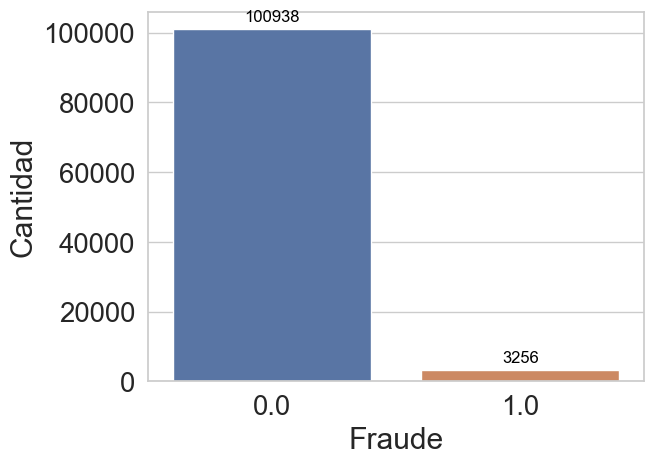

In [67]:
sns.set_style("whitegrid")

def annotate_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 9), 
                    textcoords='offset points')

ax= sns.countplot(data=df_f, x= "isFraud")
plt.xlabel("Fraude")
plt.ylabel("Cantidad")
annotate_counts(ax)

Se observa que hay un alto desbalance en las clases, esto puede corregirse con tecnicas como Smote.

#### Histograma de variables numericas

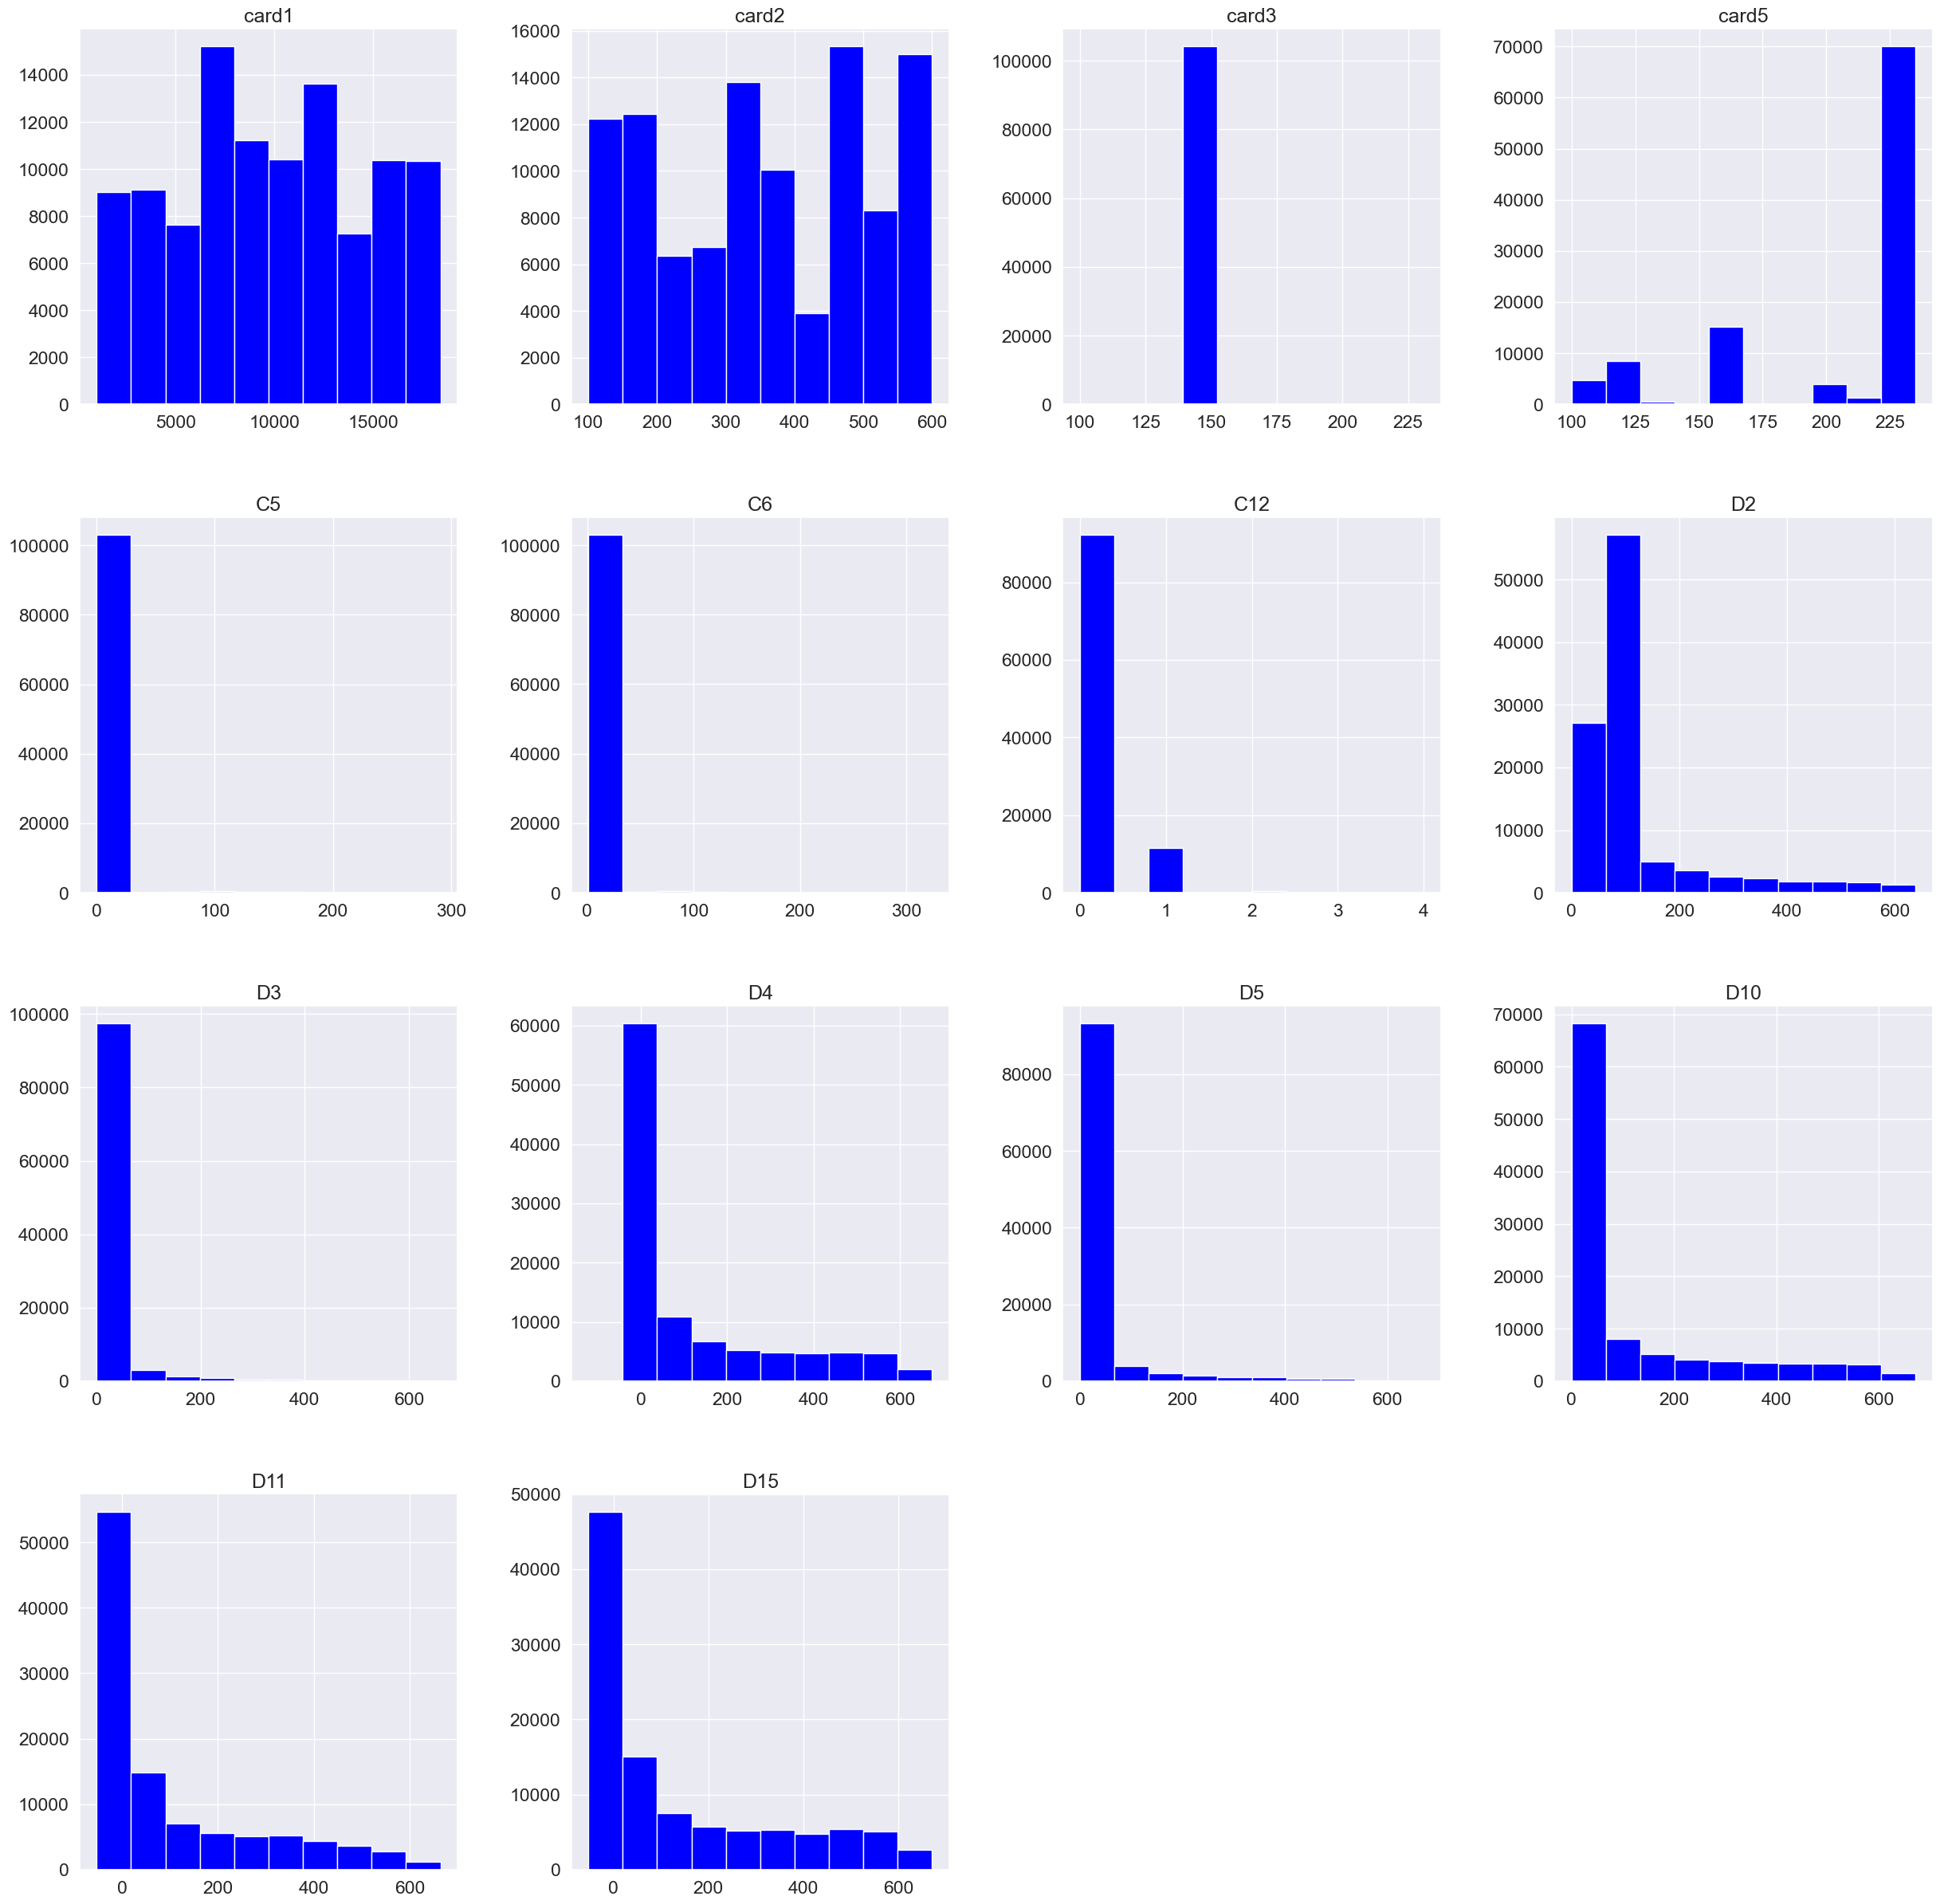

In [68]:
sns.set(font_scale=1.5)
df_f.iloc[: , 1:-6].hist(figsize = (30,30), color = 'blue');

In [69]:
df_f.to_csv("fraude.csv",index=False)

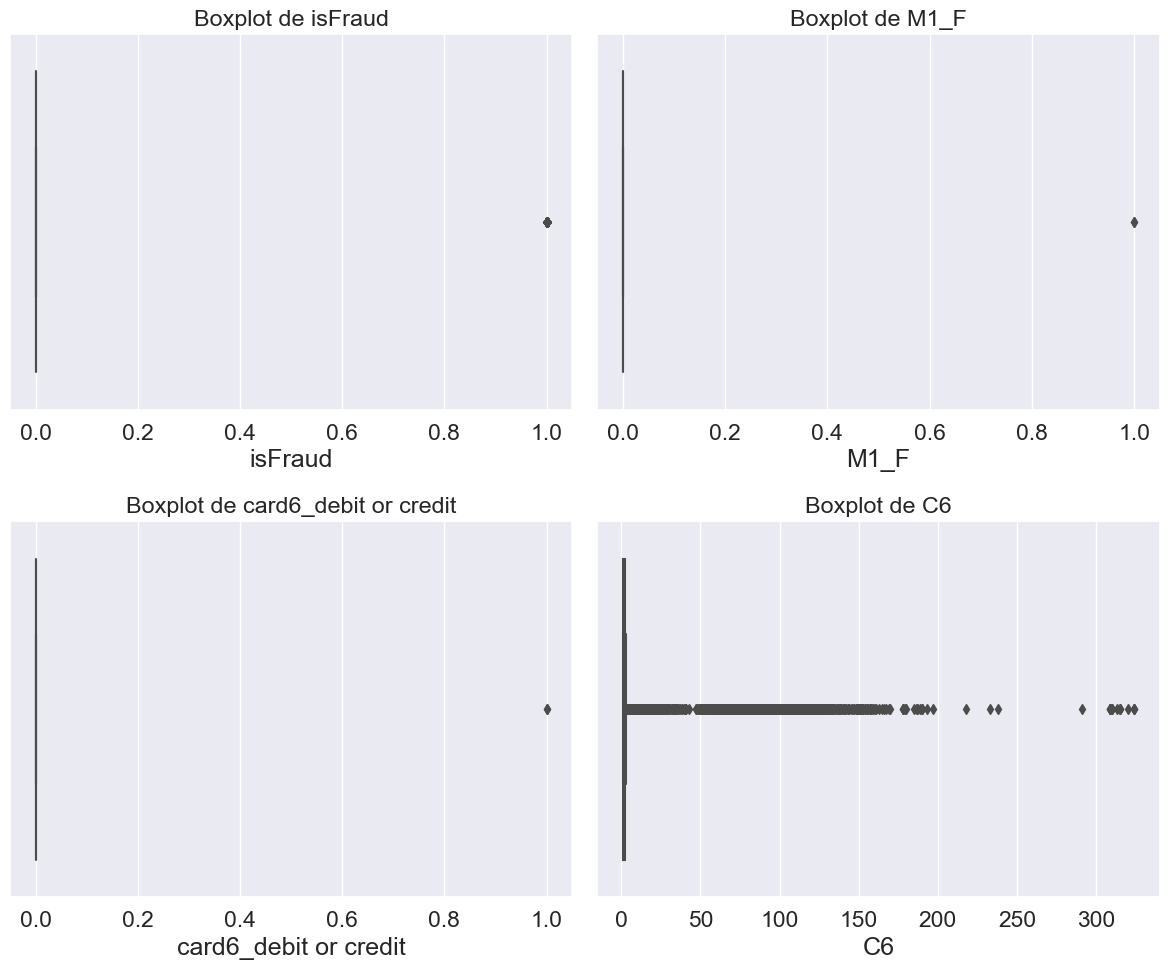

In [70]:
cat_cols = df_f.select_dtypes(include=['object']).columns
num_cols = ["isFraud", "M1_F", "card6_debit or credit", "C6"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.set(font_scale=1.4)

for idx, col in enumerate(num_cols):
    if idx < 4:  
        ax = axes[idx//2, idx%2]  
        sns.boxplot(x=df_f[col], ax=ax)
        ax.set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Se observa que: 
- La mayoria de datos se encuentra en la columna de fraude como se habia mencionado anteriormente
- La mayoria de pagos fueron realizados con tarjeta de debito.
- La tarjeta C6 fue utilizada un gran numero de veces, se evidencian un numero significativos de valores atipicos para esta variable.

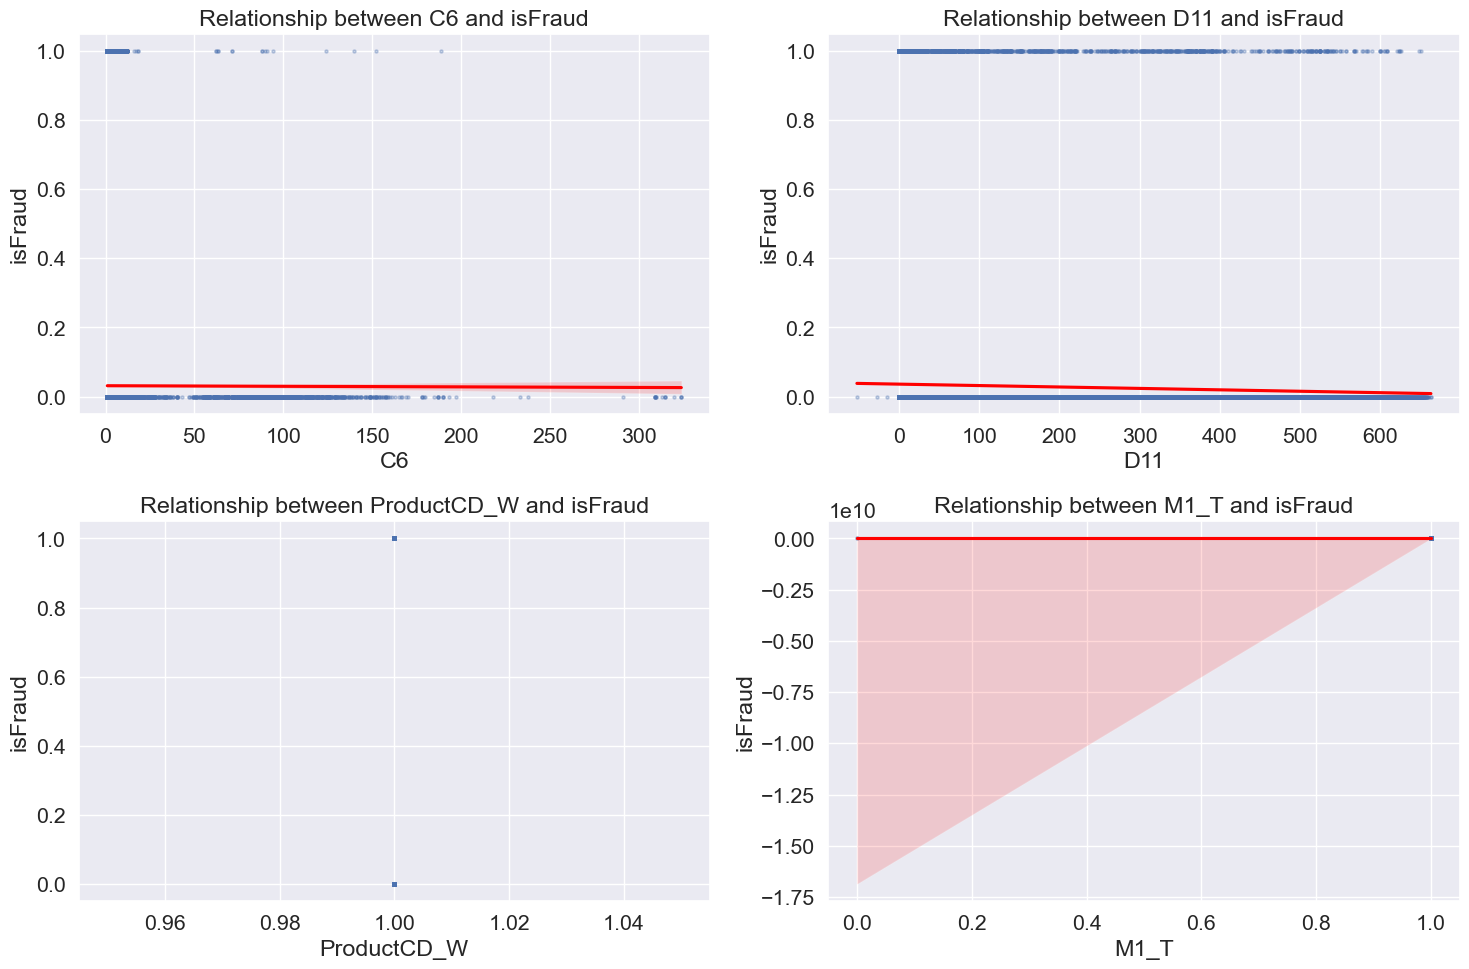

In [71]:


def plot_columns_vs_fraud(df, columns):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        sns.regplot(x=col, y='isFraud', data=df, scatter_kws={'s':5, 'alpha':0.3}, line_kws={'color':'red'}, ax=axes[i])
        axes[i].set_title(f'Relationship between {col} and isFraud')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['C6', 'D11', 'ProductCD_W', 'M1_T']
plot_columns_vs_fraud(df_f, columns_to_plot)


Se observa que mayor direcciones asociadas a una tarjeta de credito no influencia en la posibilidad de que sea fraude la transaccion, además se ve una que el hecho de que coincidan o no los nombres en la tarjeta no dictamina si sera fraude una transaccion.

## Ejercicio 5. Modelo de clasificación

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

Los datos de fraude presentan imbalance severo por lo que se utilizara la tecnica de Smote, la cual creara datos sinteticos y balanceara las caracteristicas.

In [73]:
X = df_f.drop('isFraud', axis=1)
y = df_f['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)

Por el largo tiempo de computacion se reducira el tamaño del dataframe.

In [75]:
X_sampled.shape

(151366, 20)

In [76]:
sample_size = int(0.08 * len(X_sampled)) 
X_sampled, y_sampled = resample(X_sampled, y_sampled, n_samples=sample_size, random_state=42, stratify=y_sampled)

In [77]:
X_sampled.shape

(12109, 20)

In [78]:
def custom_plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Entrenando modelo: Knn


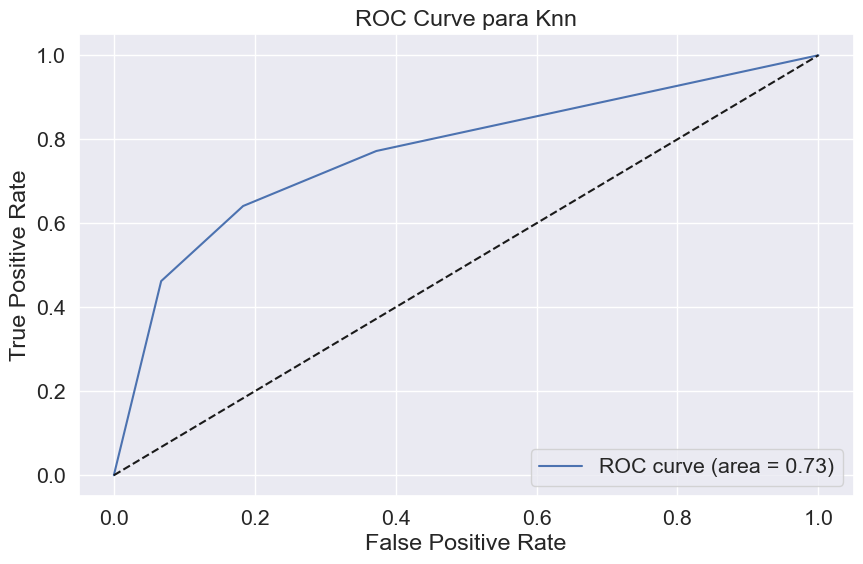

Confusion matrix, without normalization


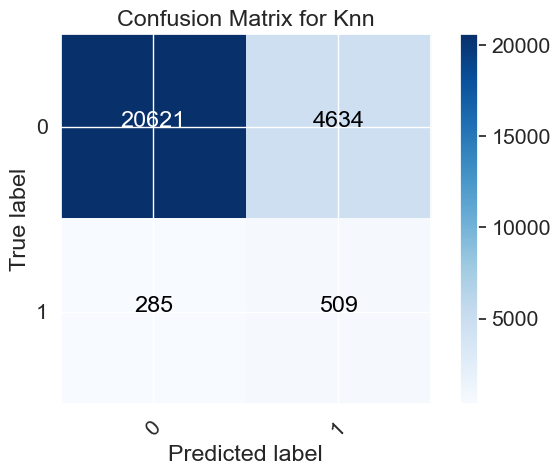

Entrenando modelo: Naive Bayes


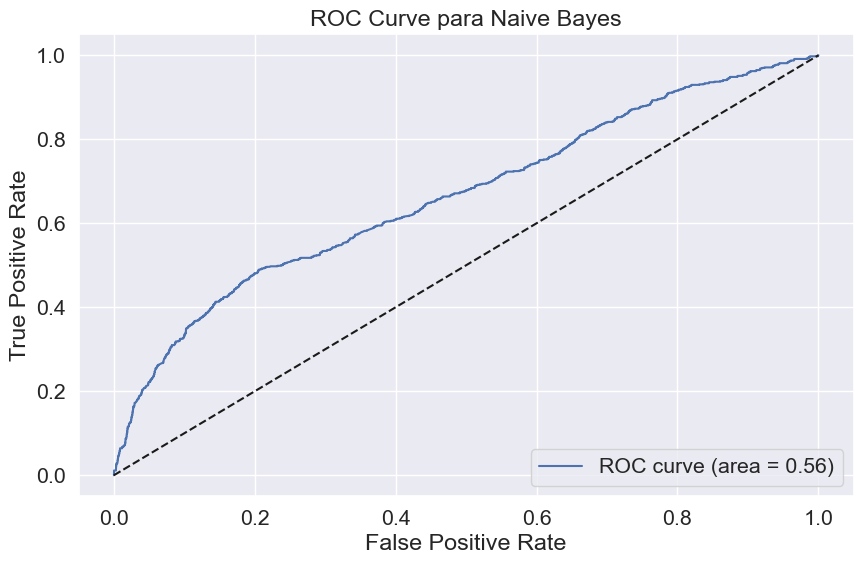

Confusion matrix, without normalization


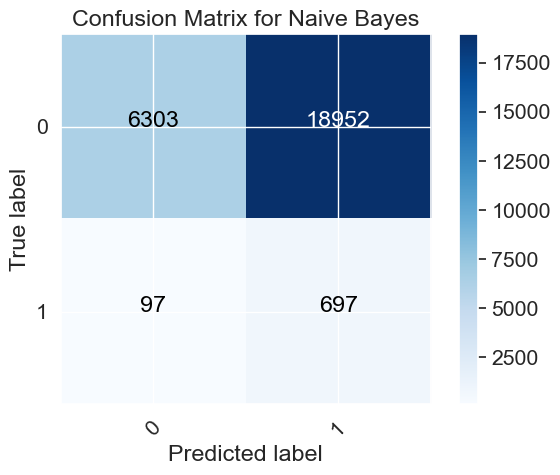

Entrenando modelo: XGBoost


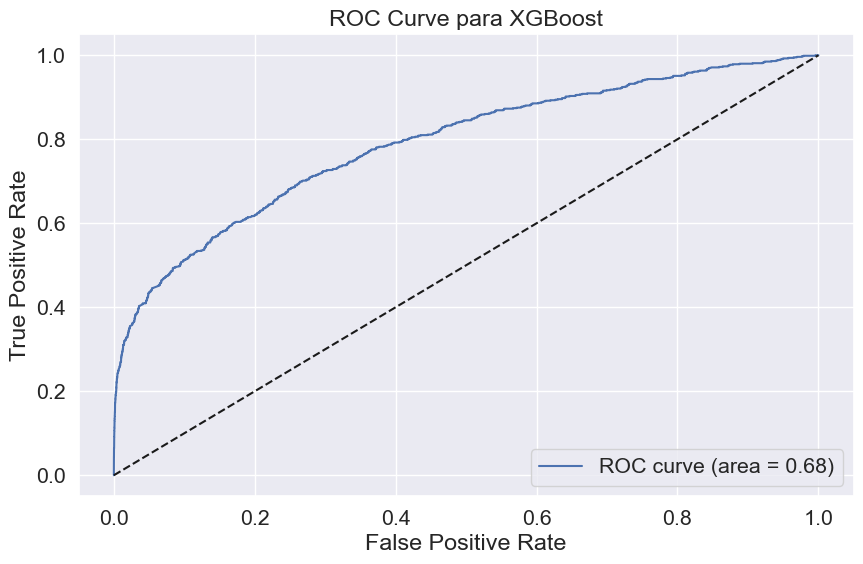

Confusion matrix, without normalization


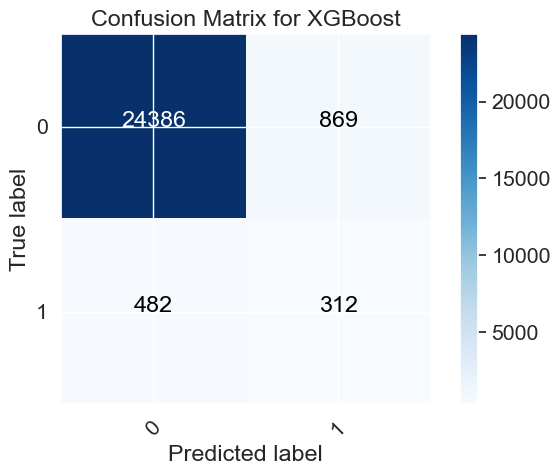

Entrenando modelo: SVc


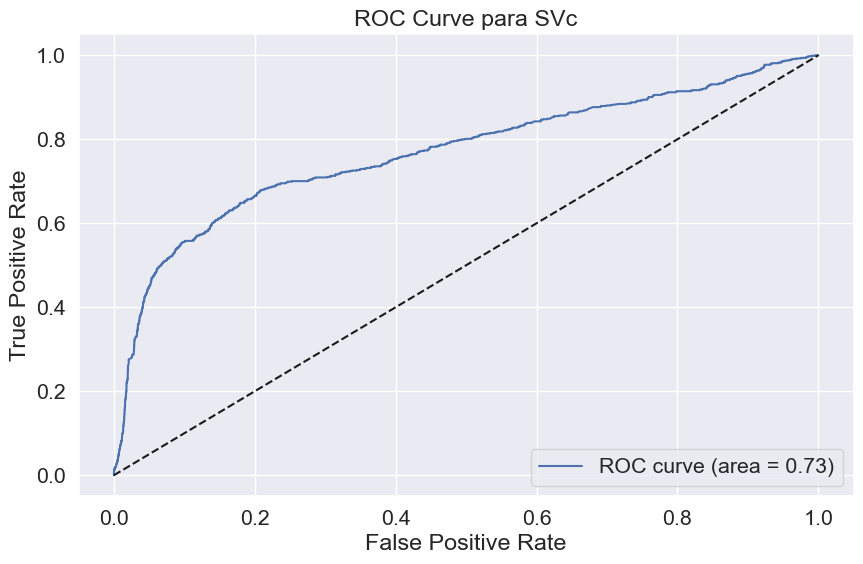

Confusion matrix, without normalization


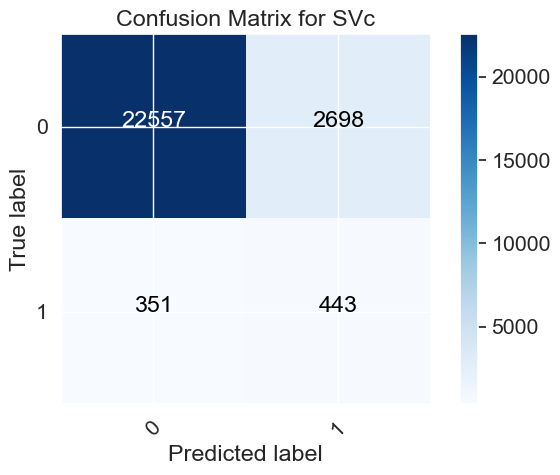

Entrenando modelo: MLP


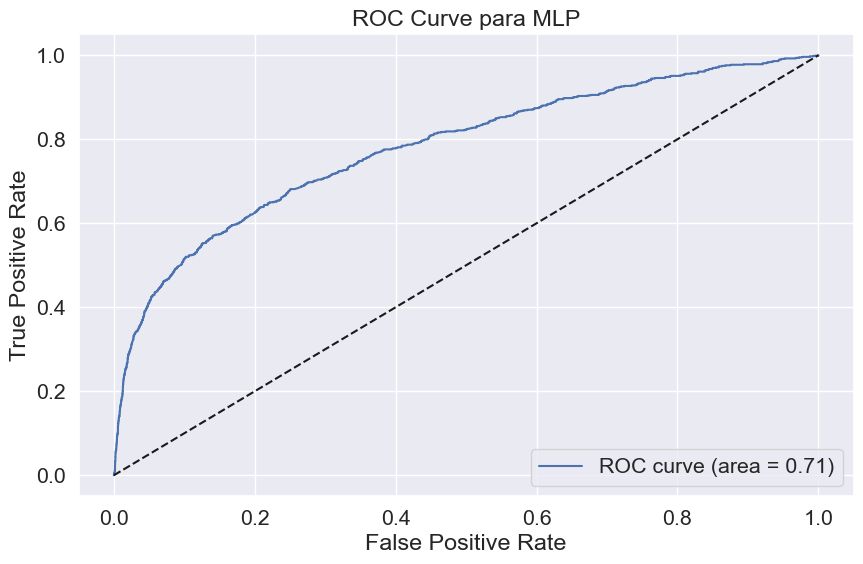

Confusion matrix, without normalization


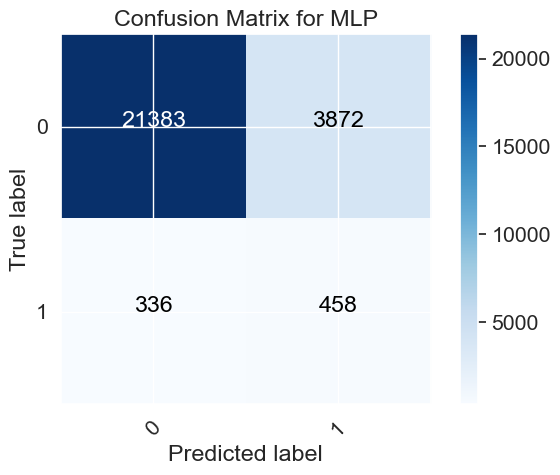

         Model  Precision    Recall  f1-score       AUC  Test set score
0          Knn   0.098969  0.641058  0.171467  0.728785        0.769207
1  Naive Bayes   0.035473  0.877834  0.068190  0.563704        0.664352
2      XGBoost   0.264183  0.392947  0.315949  0.679269        0.789138
3          SVc   0.141038  0.557935  0.225159  0.725552        0.768335
4          MLP   0.105774  0.576826  0.178767  0.711755        0.780326


In [79]:

models = {
    "Knn": (KNeighborsClassifier(), {'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}),
    "Naive Bayes": (GaussianNB(), {}),
    "XGBoost": (xgb.XGBClassifier(eval_metric='logloss'), {'xgbclassifier__n_estimators': [100, 200, 300], 'xgbclassifier__max_depth': [3, 4, 5]}),
    "SVc": (SVC(probability=True), {'svc__C': [0.01, 1, 10], 'svc__gamma': [0.01, 1, 10], 'svc__kernel': ["rbf"]}),
    "MLP": (MLPClassifier(max_iter=5000), {'mlpclassifier__hidden_layer_sizes': [1, 10, 100], 'mlpclassifier__alpha': [0.01, 0.1, 1]})
}

results_df = pd.DataFrame(columns=["Model","Precision", "Recall", "f1-score", "AUC", "Test set score"])

for model_name, (model, params) in models.items():
    print(f"Entrenando modelo: {model_name}")
    pipe = make_pipeline(StandardScaler(), model)
    grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
    
    grid.fit(X_sampled, y_sampled)
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:,1]
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve para {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    custom_plot_confusion_matrix(cm, classes=[0, 1], title=f'Confusion Matrix for {model_name}')
    
    result = {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "f1-score": f1,
        "AUC": auc,
        "Test set score": grid.score(X_test, y_test)
    }
    results_df = pd.concat([results_df, pd.DataFrame([result])], ignore_index=True)

print(results_df)


- Knn (K-Nearest Neighbors)

Precisión: 9.9%: De todas las predicciones positivas realizadas, alrededor del 10% fueron correctas.
Recall: el modelo identificó correctamente el 64.1%.
AUC: 72.9%: es un valor aceptable, indica que el modelo tiene una capacidad razonable para distinguir entre las clases.
Conclusión: Knn tiene una buena sensibilidad pero una baja precisión, lo que significa que detecta bien el fraude.

- Naive Bayes

Precisión: 3.5%: es un valor significamente bajo, esto significa que hay muchos falsos positivos.
Recall: 87.8%: significativamente alta sensibilidad, esto indica que el modelo es capaz de detectar muy bien los FP.
AUC: 56.4%: Justo por encima de un clasificador aleatorio.
Conclusión: A pesar de su alta sensibilidad, la precisión extremadamente baja de Naive Bayes sugiere que produce muchos falsos positivos.

- XGBoost

Precisión: alrededor del 26.4% fueron correctas.
Recall: 39.3% el modelo tiene una sensibilidad moderada.
AUC: 67.9%: al igual que Naive Bayes esta levemente por encima de un cualquier clasificador.
Conclusión: XGBoost tiene un equilibrio entre precisión y sensibilidad.

- Support Vector Machine

Precisión: 14.1%, indica  lo que indica falsos positivos.
Recall: 55.8%: Sensibilidad moderada-alta.
AUC: 72.6%: Un valor aceptable.
Conclusión: SVc tiene una sensibilidad decente y una AUC aceptable, pero el  modelo presenta una precision baja.

- MLP (Multi-Layer Perceptron)

Precisión: 10.9% que indica muchos falsos positivos.
Recall: 57.4%: Sensibilidad moderada-alta.
AUC: 71.3%: Un valor aceptable.
Conclusión: MLP, al igual que SVc, muestra una sensibilidad decente y una AUC aceptable, pero su precisión es baja.

En conclusion los modelos que mejor capacidad de generalizar tienen son XGBoost y MLP, seguidos de KNN y SVM.

### Ejercicio 5. Modelos de regresion

In [92]:
df_wind = df

In [93]:
total_rows = len(df_wind)

midpoint = total_rows // 14

df_mitad = df_wind.iloc[:midpoint]

In [94]:
df_mitad.shape

(6263, 9)

In [95]:
X= df_mitad.drop(['velocidad horaria viento'],axis=1)
y = df_mitad['velocidad horaria viento']

In [96]:
X.shape

(6263, 8)

In [97]:
wind_test = df_mitad[-24:]

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Evitar divisiones por cero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [100]:
window_size =24 
total_rows = len(df_mitad)//2
max_rows_divisible_by_24= (total_rows//window_size)*window_size
iterations =(max_rows_divisible_by_24 // window_size)

### KNeighborsRegressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor

n_values = [1,3,5,7]

best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None

for n in n_values:
    
    knn = KNeighborsRegressor(n_neighbors=n)
    mape_values_total = []
    rmse_values_total = []
    r2_values_total = []
    
    for i in range(0, iterations):
        train_start = 0
        train_end = (i + 1) * window_size - 1
        val_start = (i + 1) * window_size
        val_end = (i + 2) * window_size - 1

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_val = X.iloc[val_start:val_end]
        y_val = y.iloc[val_start:val_end]

        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)

        knn.fit(X_train_scaled, y_train)

        y_pred = knn.predict(scaler.transform(X_val))
        
        mape_values = (mean_absolute_percentage_error(y_val, y_pred))
        mape_values_total.append(mape_values)
        rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
        rmse_values_total.append(rmse_values)
        r2_values= (r2_score(y_val, y_pred))
        r2_values_total.append(r2_values)

    mean_mape = np.mean(mape_values_total)
    mean_rmse = np.mean(rmse_values_total)
    mean_r2 = np.mean(r2_values_total)

    if mean_rmse < best_rmse_overall:
        best_rmse_overall = mean_rmse
        best_mape_overall = mean_mape
        best_r2_overall = mean_r2
        best_paramter_knn = {"n": n}
        
print(best_paramter_knn)

{'n': 7}


### Lasso

In [102]:
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1]

best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None

for alpha in alphas:
    
    lasso = Lasso(alpha=alpha)
    
    mape_values_total = []
    rmse_values_total = []
    r2_values_total = []
    
    for i in range(0, iterations):
        train_start = 0
        train_end = (i + 1) * window_size - 1
        val_start = (i + 1) * window_size
        val_end = (i + 2) * window_size - 1

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_val = X.iloc[val_start:val_end]
        y_val = y.iloc[val_start:val_end]

        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)

        lasso.fit(X_train_scaled, y_train)

        y_pred = lasso.predict(scaler.transform(X_val))
        
        mape_values = (mean_absolute_percentage_error(y_val, y_pred))
        mape_values_total.append(mape_values)
        rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
        rmse_values_total.append(rmse_values)
        r2_values= (r2_score(y_val, y_pred))
        r2_values_total.append(r2_values)

    mean_mape = np.mean(mape_values_total)
    mean_rmse = np.mean(rmse_values_total)
    mean_r2 = np.mean(r2_values_total)

    if mean_rmse < best_rmse_overall:
        best_rmse_overall = mean_rmse
        best_mape_overall = mean_mape
        best_r2_overall = mean_r2
        best_paramter_lasso = {"alpha": alpha}
        
print(best_paramter_lasso)


{'alpha': 0.001}


### Ridge

In [103]:
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None

for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)
    
    mape_values_total = []
    rmse_values_total = []
    r2_values_total = []
    
    for i in range(0, iterations):
        train_start = 0
        train_end = (i + 1) * window_size - 1
        val_start = (i + 1) * window_size
        val_end = (i + 2) * window_size - 1

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_val = X.iloc[val_start:val_end]
        y_val = y.iloc[val_start:val_end]

        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)

        ridge.fit(X_train_scaled, y_train)

        y_pred = ridge.predict(scaler.transform(X_val))
        
        mape_values = (mean_absolute_percentage_error(y_val, y_pred))
        mape_values_total.append(mape_values)
        rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
        rmse_values_total.append(rmse_values)
        r2_values= (r2_score(y_val, y_pred))
        r2_values_total.append(r2_values)

    mean_mape = np.mean(mape_values_total)
    mean_rmse = np.mean(rmse_values_total)
    mean_r2 = np.mean(r2_values_total)

    if mean_rmse < best_rmse_overall:
        best_rmse_overall = mean_rmse
        best_mape_overall = mean_mape
        best_r2_overall = mean_r2
        best_parameter_ridge = {"alpha": alpha}
        
print(best_parameter_ridge)

{'alpha': 1}


### XGboost

In [104]:
import xgboost as xgb

n_estimators_values = [100, 200, 300]
max_depth_values = [3, 4, 5]
best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None


for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        
        xgb_regressor = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        mape_values_total = []
        rmse_values_total = []
        r2_values_total = []
        
        for i in range(0, iterations):
            train_start = 0
            train_end = (i + 1) * window_size - 1
            val_start = (i + 1) * window_size
            val_end = (i + 2) * window_size - 1

            X_train = X.iloc[train_start:train_end]
            y_train = y.iloc[train_start:train_end]
            X_val = X.iloc[val_start:val_end]
            y_val = y.iloc[val_start:val_end]

            scaler = MinMaxScaler().fit(X_train)
            X_train_scaled = scaler.transform(X_train)

            xgb_regressor.fit(X_train_scaled, y_train)

            y_pred = xgb_regressor.predict(scaler.transform(X_val))
            
            mape_values = (mean_absolute_percentage_error(y_val, y_pred))
            mape_values_total.append(mape_values)
            rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
            rmse_values_total.append(rmse_values)
            r2_values= (r2_score(y_val, y_pred))
            r2_values_total.append(r2_values)

        mean_mape = np.mean(mape_values_total)
        mean_rmse = np.mean(rmse_values_total)
        mean_r2 = np.mean(r2_values_total)

        if mean_rmse < best_rmse_overall:
            best_rmse_overall = mean_rmse
            best_mape_overall = mean_mape
            best_r2_overall = mean_r2
            best_parameter_xgboost = {"n_estimators": n_estimators,"max_depth_values":max_depth_values}
        
print(best_parameter_xgboost)

{'n_estimators': 100, 'max_depth_values': [3, 4, 5]}


### SVR

In [105]:
from sklearn.svm import SVR

C_values= [0.01, 1, 10]
gamma_values = [0.01, 1, 10]
kernel_values = ["rbf", "linear"]

best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None


for C_value in C_values:
    for gamma_value in gamma_values:
        for kernel_value in kernel_values:
    
            svr_regression = SVR(C=C_value, gamma=gamma_value, kernel=kernel_value) 
            mape_values_total = []
            rmse_values_total = []
            r2_values_total = []
            
            for i in range(0, iterations):
                train_start = 0
                train_end = (i + 1) * window_size - 1
                val_start = (i + 1) * window_size
                val_end = (i + 2) * window_size - 1

                X_train = X.iloc[train_start:train_end]
                y_train = y.iloc[train_start:train_end]
                X_val = X.iloc[val_start:val_end]
                y_val = y.iloc[val_start:val_end]

                scaler = MinMaxScaler().fit(X_train)
                X_train_scaled = scaler.transform(X_train)

                svr_regression.fit(X_train_scaled, y_train)

                y_pred = svr_regression.predict(scaler.transform(X_val))
                
                mape_values = (mean_absolute_percentage_error(y_val, y_pred))
                mape_values_total.append(mape_values)
                rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
                rmse_values_total.append(rmse_values)
                r2_values= (r2_score(y_val, y_pred))
                r2_values_total.append(r2_values)

            mean_mape = np.mean(mape_values_total)
            mean_rmse = np.mean(rmse_values_total)
            mean_r2 = np.mean(r2_values_total)

            if mean_rmse < best_rmse_overall:
                best_rmse_overall = mean_rmse
                best_mape_overall = mean_mape
                best_r2_overall = mean_r2
                best_parameter_svr = {"C": C_value,"gamma":gamma_value,"kernel":kernel_value}
        
print(best_parameter_svr)


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


### MLP Regressor

In [106]:
from sklearn.neural_network import MLPRegressor

hidden_layer_sizes = [1, 10, 100]
alpha = [0.01, 0.1, 1]
activation =["relu","identity"]

best_rmse_overall = 2000
best_n = None
best_mape_overall = None
best_r2_overall = None

for hidden_layer in hidden_layer_sizes:
    for alp in alpha:
        for act in activation: 
            
            mlp_regressor = MLPRegressor(hidden_layer_sizes=hidden_layer, alpha=alp, activation=act)
            mape_values_total = []
            rmse_values_total = []
            r2_values_total = []

            for i in range(0, iterations):
                train_start = 0
                train_end = (i + 1) * window_size - 1
                val_start = (i + 1) * window_size
                val_end = (i + 2) * window_size - 1

                X_train = X.iloc[train_start:train_end]
                y_train = y.iloc[train_start:train_end]
                X_val = X.iloc[val_start:val_end]
                y_val = y.iloc[val_start:val_end]

                scaler = MinMaxScaler().fit(X_train)
                X_train_scaled = scaler.transform(X_train)

                mlp_regressor.fit(X_train_scaled, y_train)

                y_pred = mlp_regressor.predict(scaler.transform(X_val))
                
                mape_values = (mean_absolute_percentage_error(y_val, y_pred))
                mape_values_total.append(mape_values)
                rmse_values= (np.sqrt(mean_squared_error(y_val, y_pred)))
                rmse_values_total.append(rmse_values)
                r2_values= (r2_score(y_val, y_pred))
                r2_values_total.append(r2_values)

            mean_mape = np.mean(mape_values_total)
            mean_rmse = np.mean(rmse_values_total)
            mean_r2 = np.mean(r2_values_total)

            if mean_rmse < best_rmse_overall:
                best_rmse_overall = mean_rmse
                best_mape_overall = mean_mape
                best_r2_overall = mean_r2
                best_parameter_mlp = {"hidden_layer": hidden_layer,"alpha":alpha,"activation":activation}
        
print(best_parameter_mlp)


{'hidden_layer': 100, 'alpha': [0.01, 0.1, 1], 'activation': ['relu', 'identity']}


### Evaluacion de los modelos con los mejores parametros

In [107]:
X_wind = wind_test.drop(['velocidad horaria viento'],axis=1)
y_wind = wind_test['velocidad horaria viento']
X_train = df_mitad.drop(['velocidad horaria viento'],axis=1)
y_train = df_mitad['velocidad horaria viento']

In [110]:
models = {
    "Knn": KNeighborsRegressor(n_neighbors=7),
    "Ridge": Ridge(alpha=0.001),
    "Lasso": Lasso(alpha=1),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=3),
    "SVR": SVR(C=10, gamma=1, kernel='rbf'),
    "MLP": MLPRegressor(hidden_layer_sizes=100,alpha=0.01,activation="identity")
}

results_df = pd.DataFrame(columns=["Model", "Best RMSE", "MAPE", "R2", "Test set score"])
for model_name, model_instance in models.items():
    pipe = make_pipeline(MinMaxScaler(), model_instance)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)  # change this if you want predictions on a different set
    mape = mean_absolute_percentage_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)
    
    result = {
        "Model": model_name,
        "Best RMSE": rmse,
        "MAPE": mape,
        "R2": r2,
        "Test set score": pipe.score(X_wind, y_wind)  # might want to change X_wind and y_wind if it's not the desired set
    }
    
    results_df = pd.concat([results_df, pd.DataFrame([result])], ignore_index=True)
results_df

,Model,Best RMSE,MAPE,R2,Test set score
0,Knn,0.568893,31.383783,0.819546,0.788553
1,Ridge,0.617563,31.890031,0.787349,0.777957
2,Lasso,1.339207,87.332642,0.000000,-0.418807
3,XGBoost,0.493419,26.385804,0.864251,0.824055
4,SVR,0.555373,29.760821,0.828022,0.810566
5,MLP,0.620310,32.480895,0.785453,0.771317


#### Conclusión

- Knn: Este modelo tiene un buen desempeño con un RMSE de 0.5689 y r2 de  0.8195, en el conjunto de prueba, tiene un score de 0.7885.

- Ridge: Aunque tiene un RMSE ligeramente más alto que el Knn, sigue siendo competitivo. Su test set score de 0.77 en el conjunto de test indica que tiene buena capacidad para generalizar.

- Lasso: Este modelo no se desempeña bien en estos datos. Su RMSE es considerablemente alto y su R2 es 0, lo que indica que no es capaz de explicar la variabilidad de los datos. Además, su score negativo en el conjunto de test indica que modelo se desempeña pesimamente para generalizar datos que no conoce.

- XGBoost: Este es el modelo que mejor desempeño tiene entre todos. Con el RMSE más bajo de 0.4934 y un de 0.8642. Además, tiene el score más alto en el conjunto de test de 0.8241.

- SVR: El modelo SVR también muestra un buen desempeño con un RMSE de 0.5553 y un R2 de 0.8280, con un rendimiento de 0.81 para test.

- MLP: Aunque este modelo tiene un RMSE y similares al modelo Ridge, su score en el conjunto de prueba es ligeramente menor.

Basándonos en el RMSE, R2 y el score en el conjunto de test, XGBoost es el modelo que mejor se desempeña en el conjunto de datos de pronostico de velocidad del viento.